# Library importation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, KFold
from sklearn.feature_selection import RFE
from matplotlib import colors

# Data Exploration

In [5]:
df = pd.read_csv("spotify_data.csv")

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
df.shape

(169909, 19)

In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [6]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

# Data Preprocessing

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

There is no missing values on the dataframe

### Change of the data types

In [10]:
df["artists"] = df["artists"].str.replace("[", "", regex=True).str.replace("]", "", regex=True).astype("string")

In [6]:
df["explicit"].unique()

array([0, 1])

In [11]:
# explicit is a boolean value. So instead of having an int, it's better to have a boolean
df["explicit"] = df["explicit"].astype("bool")

In [12]:
# id is actually a string, so we can replace its type from object to string
df["id"] = df["id"].astype("string")

In [25]:
print(df["key"].max())
df["key"].min()

11


0

In [13]:
# maximum value of key is 11 and the minimum value is 0 so int8 is enough to represent the key
df["key"] = df["key"].astype("int8")

In [31]:
df["mode"].unique()

array([1, 0])

In [14]:
# mode represents the modality of a track. 0 for minor and 1 for major.
# we'll use int8 to represent it
df["mode"] = df["mode"].astype("int8")

In [15]:
# change the data type of name from object to string
df["name"] = df["name"].astype("string")

In [35]:
print(df["popularity"].max())
df["popularity"].min()

100


0

In [16]:
# the popularity is between 0 and 100 so 8 bits are enough
df["popularity"] = df["popularity"].astype("int8")

In [12]:
print(df["tempo"].min())
df["tempo"].max()

0.0


244.091

It's better not to change the type of tempo because it doesn't have a fix interval and depend from the duration

In [83]:
# remove the release_date column because of the inconsistency of its data
# sometimes we have the whole date and other times, it's just the year
# it seems like just keeping the year column is relevant
new_df = df.drop(columns=["release_date"])

In [84]:
# now let's see the memory usage after that preprocessing
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  string 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  bool   
 6   id                169909 non-null  string 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int8   
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int8   
 12  name              169909 non-null  string 
 13  popularity        169909 non-null  int8   
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  float64
 16  valence           16

We reduced the size from 25MB to 18.8MB

In [85]:
new_df.shape

(169909, 18)

In [18]:
new_df.drop_duplicates(inplace=True)

In [15]:
new_df.shape

(169909, 18)

No duplicate value

# Data Visualization

## PCA

In [206]:
new_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [18]:
songs_id = new_df["id"]

In [18]:
# remove non-numerical data and categorical data
pca_df = new_df.drop(columns=["name", "artists", "id", "explicit", "mode"])

In [19]:
pca_df = new_df.drop(columns=["name", "artists", "id"])

# apply the log on duration_ms
pca_df["duration_ms"] = pca_df["duration_ms"].apply(np.log)

# centered data 
pca_df = pca_df - pca_df.mean()

# perform PCA
pca = PCA()
pca_model = pca.fit_transform(pca_df)

In [26]:
column = [f"PC {i+1}" for i in range(pca.n_components_)]

In [27]:
songs_ids = new_df["id"].tolist()
# let's see the data in the pca space
pca_space_df = pd.DataFrame(pca_model, index=songs_ids, columns=column)
pca_space_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
6KbQ3uYMLKb5jDxLF7wYDD,47.298664,-33.496750,-6.831117,-4.122078,4.771617,-0.353952,0.067012,-0.206238,0.147109,0.133307,-0.336644,-0.091504,-0.111758,-0.125123,-0.015456
6KuQTIu1KoTTkLXKrwlLPV,67.797473,-5.199099,-7.265930,10.962658,3.198372,-0.148380,-0.567682,0.067961,0.287768,0.303161,0.069147,-0.138951,0.023925,-0.000675,-0.156786
6L63VW0PibdM1HDSBoqnoM,54.201155,-24.290924,-7.045932,3.144215,-0.007315,0.566546,0.911230,0.650160,0.010269,-0.260741,-0.027219,-0.040328,-0.399838,0.476548,0.195272
6M94FkXd15sOAOQYRnWPN8,53.310769,-24.853850,-6.906720,-1.853086,-4.150871,0.785353,0.215439,-0.296587,0.337218,0.168755,-0.418507,-0.126417,-0.208801,-0.119765,-0.031314
6N6tiFZ9vLTSOIxkj8qKrd,78.380597,13.590698,-7.688573,-1.240064,5.860678,0.027254,-1.473737,-0.181493,0.150557,0.474371,-0.032419,-0.115688,0.049887,0.068309,0.024803


In [28]:
# let's take a look to the coordinates of components in the original space
df_origin_to_pca = pd.DataFrame(pca.components_.T, index=pca.feature_names_in_, columns=column)
df_origin_to_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
acousticness,0.006729,-0.002751,-0.001865,0.020992,-0.000347,-0.051515,0.020202,-0.642147,-0.464695,-0.011783,-0.446498,0.210932,0.150879,0.258303,-0.186199
danceability,-0.000892,0.000842,-0.000921,-0.008140,0.000584,-0.001619,0.111658,0.210368,0.006321,-0.122003,-0.411878,-0.117902,-0.573246,-0.202040,-0.612622
duration_ms,-0.001831,0.001642,0.000377,-0.001086,-0.000581,0.248414,-0.924557,0.173826,-0.097002,-0.050664,-0.200164,0.021441,0.007494,0.021059,0.016119
energy,-0.004380,0.001053,0.001895,-0.031362,0.000083,0.023767,-0.004531,0.212406,0.332423,-0.026176,0.123339,0.202697,0.414392,0.508475,-0.596268
explicit,-0.001613,0.001327,0.001858,-0.002220,0.000326,0.052476,0.142155,0.413622,-0.300535,0.728057,-0.277961,-0.018560,0.298060,-0.136169,-0.023801
instrumentalness,0.002723,-0.001015,0.000988,0.019097,0.000090,0.061822,-0.108478,-0.407713,0.695067,0.500715,-0.242664,0.007780,-0.147089,-0.022186,0.053857
key,-0.001195,0.000592,0.001889,-0.027790,0.999498,-0.014093,-0.004687,-0.000776,-0.000482,0.001793,0.000451,-0.000227,-0.000200,-0.000457,-0.000046
liveness,0.000245,-0.000288,0.000979,-0.003503,-0.000161,0.002299,-0.005588,0.061759,-0.009942,0.052311,0.136025,0.928545,-0.169415,-0.289585,-0.006418
loudness,-0.084998,0.024469,0.028385,-0.994145,-0.027903,-0.000037,-0.004714,-0.036148,-0.011760,0.017130,-0.002531,-0.006612,-0.014012,-0.006599,0.014755
mode,0.000264,-0.000528,0.000057,0.000090,-0.014783,-0.962411,-0.245835,0.072935,0.022179,0.079671,-0.026972,-0.003521,-0.009167,0.007880,-0.008081


In [29]:
# part of the variance explained by each component
pca.explained_variance_ratio_

array([5.49536741e-01, 4.02418368e-01, 3.07289069e-02, 1.11056006e-02,
       5.85166750e-03, 9.82006493e-05, 8.20190567e-05, 4.74495263e-05,
       3.53963765e-05, 3.45890459e-05, 2.67406353e-05, 1.51156268e-05,
       8.23726862e-06, 6.35413506e-06, 4.61314108e-06])

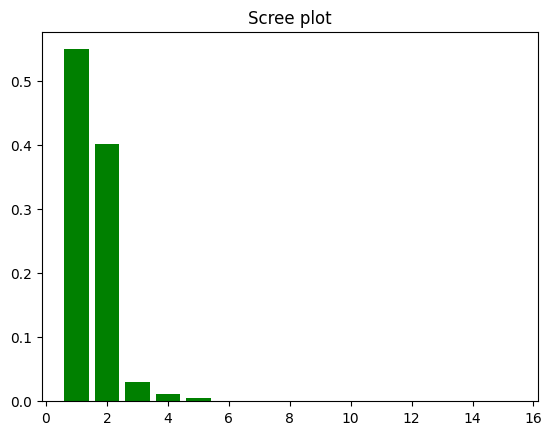

In [24]:
# explained variance ratio

# get the number of singular values which is equal to the number of components
nb_sing_values = len(pca.singular_values_)

# plot a bar chart of the explained variance
plt.title("Scree plot")
plt.bar(x = range(1, nb_sing_values+1), height=pca.explained_variance_ratio_, color="g")
plt.show()

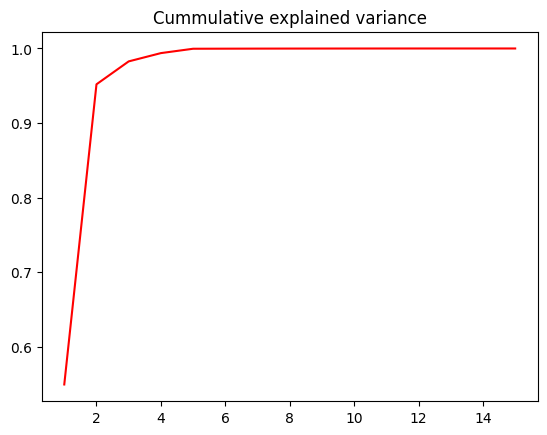

In [25]:
# let us take a look to the cumulative explained variance
plt.title("Cummulative explained variance")
plt.plot(range(1, nb_sing_values+1), np.cumsum(pca.explained_variance_ratio_), c="r")
plt.show()

From this plot, we can see that 2 components are enough to get good insights of our data

### 2D representation

#### Representation with the first 2 components

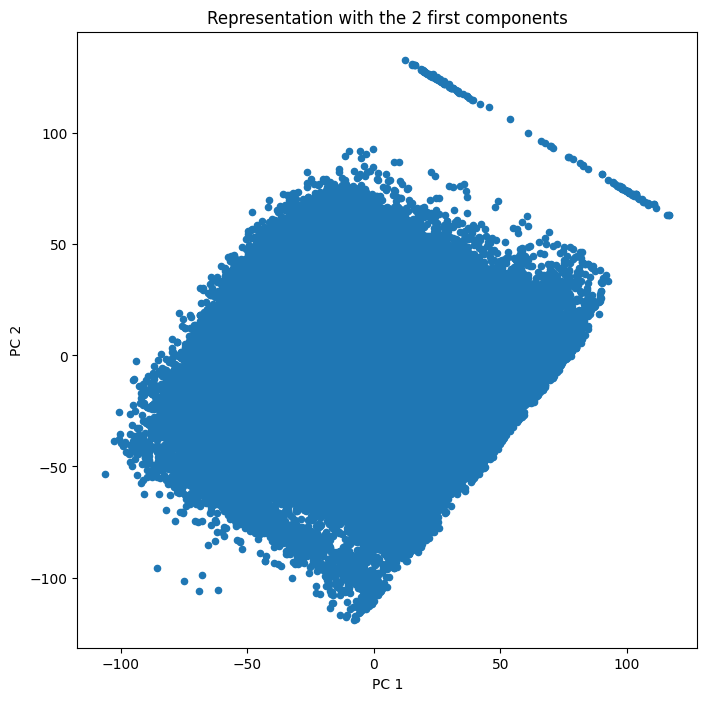

In [66]:
ax = pca_space_df.plot(kind='scatter',x='PC 1', y='PC 2',figsize=(8,8))
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("Representation with the 2 first components")
plt.show()

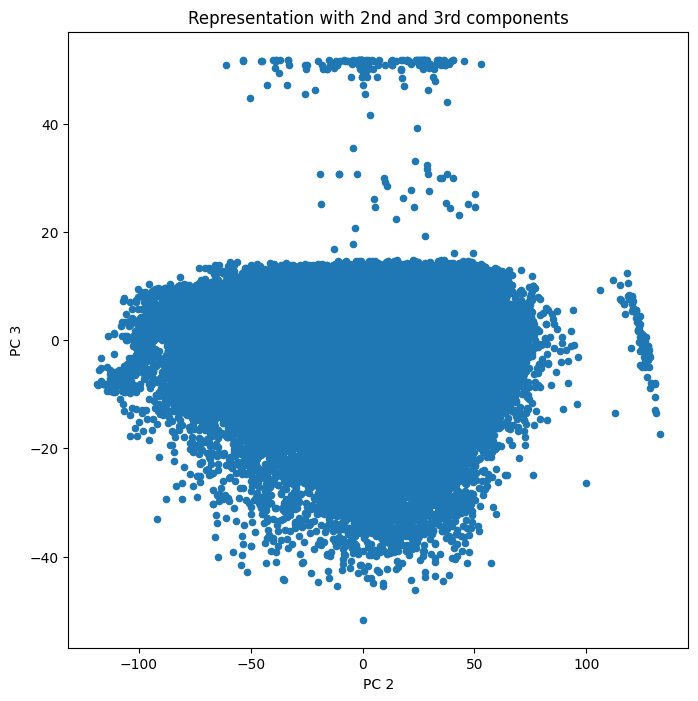

In [67]:
ax = pca_space_df.plot(kind='scatter',x='PC 2', y='PC 3',figsize=(8,8))
ax.set_xlabel("PC 2")
ax.set_ylabel("PC 3")
ax.set_title("Representation with 2nd and 3rd components")
plt.show()

## What do these clusters represent ?

#### Data from the representation with 2nd and 3rd components

In [69]:
# cluster from PC 2 >= 100
temp = pca_space_df[(pca_space_df["PC 2"] >= 100)].index.tolist()

In [73]:
new_df[new_df["id"].isin(temp)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
6930,0.931000,'Crain & Taylor',0.0,598425,0.000075,False,3oKBZhpwrMiOhosXauv3lP,0.892000,1,0.115,-19.703,0,Ocean Waves,47,0.0,0.0,0.0,2008
7411,0.111000,'Sound Dreamer',0.0,5403500,0.000099,False,7foc25ig7dibxvULPU2kBG,0.392000,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,0.0,0.0,0.0,2013
7792,0.145000,'Fan Sounds',0.0,500167,0.000020,False,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,0.0,0.0,0.0,2017
15605,0.962000,'Hippie Sabotage',0.0,157041,0.236000,True,4aVbFYIU67P8F5pqPakaXQ,0.000335,7,0.105,-13.909,0,Waiting Too Long,54,0.0,0.0,0.0,2014
15787,0.956000,'White Noise Spa',0.0,300300,0.000020,False,5wf3wwLBJj4j46xtJETZ8L,0.238000,10,0.131,-20.961,0,Soothing Deep Pink Noise,58,0.0,0.0,0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161305,0.960000,'Fizzonaut',0.0,132923,0.000261,False,6UrBiRJabWOu90XTluKZER,0.203000,1,0.111,-23.444,1,Tepid Rainscape,68,0.0,0.0,0.0,2019
161443,0.916000,'Water Sound Natural White Noise',0.0,63000,0.032000,False,5pGBDKBaR63vuJ4g8ialcU,0.202000,1,0.103,-30.704,1,Deep Sleep Recovery Noise,70,0.0,0.0,0.0,2020
169522,0.913000,'Granular',0.0,205161,0.000164,False,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,0.0,0.0,0.0,2017
169743,0.000013,'Naturaleza FX',0.0,150879,0.000020,False,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,0.0,0.0,0.0,2019


In [74]:
new_df[new_df["id"].isin(temp)]["year"].unique()

array([2008, 2013, 2017, 2014, 2016, 2019, 2007, 2010, 2015, 2018, 2009,
       1998, 1991, 2012, 2020])

The 2nd component represents songs with a tempo equal to 0.

And it turns out that when the tempo is equal to 0, the speechiness, the danceability and the valence are also null.

In [64]:
# max popularity of the songs
new_df[new_df["id"].isin(temp)]["popularity"].max()

13

In [76]:
temp = pca_space_df[(pca_space_df["PC 3"] >= 40)].index.tolist()
new_df[new_df["id"].isin(temp)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
8077,0.0106,'Tame Impala',0.622,218200,0.784,True,3Naa5mKj5pbrNGyHsE04zo,0.008900,1,0.1040,-3.830,0,The Less I Know The Better,0,0.0292,116.892,0.780,2020
8084,0.0352,'Anitta',0.967,205595,0.772,False,5JY9u3KjWIGL188kp59Ktn,0.000013,3,0.0792,-3.291,0,Blá blá blá - Extended Remix,1,0.0851,131.998,0.856,2020
8090,0.4600,'Morat',0.591,230040,0.659,False,0BLnBgQf8xmFN2qsxF16hy,0.000000,11,0.3240,-5.464,1,Enamórate De Alguien Más,2,0.0332,145.997,0.622,2020
8092,0.0608,'Morat',0.582,240240,0.921,False,3YV7XXT0lAlY4wACbw3HDZ,0.000000,4,0.1370,-3.928,1,Cómo Te Atreves,0,0.0457,131.004,0.686,2020
8093,0.1260,"'Morat', 'Juanes'",0.683,231440,0.970,False,4AUgtXs2HmOXrw0ROxQM8l,0.000000,2,0.1050,-3.589,1,Besos En Guerra,0,0.0489,143.931,0.769,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169848,0.2620,'Ellie Goulding',0.453,148689,0.316,False,2qND8W95D4UIab4MszDGyS,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,3,0.0316,125.628,0.177,2020
169849,0.2620,'Ellie Goulding',0.453,148689,0.316,False,3AMQUcKmht3G7PhvTJYuZ4,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,0.0316,125.628,0.177,2020
169850,0.9320,'Ellie Goulding',0.491,188733,0.367,False,54OjRoNNwpExHizhCKhddk,0.000876,10,0.1110,-7.164,1,Your Song,0,0.0308,134.105,0.455,2020
169851,0.9730,'Ellie Goulding',0.415,207373,0.262,False,6lMqDaZjoqe6J1p8TdHuBZ,0.000003,9,0.1060,-12.530,1,I Know You Care,4,0.0333,105.861,0.311,2020


In [78]:
new_df[new_df["id"].isin(temp)]["year"].unique()

array([2020])

In [79]:
new_df[new_df["id"].isin(temp)]["popularity"].unique()

array([ 0,  1,  2,  4, 13,  8,  9,  5, 10,  6,  7,  3], dtype=int8)

The third principal component represents the least popular song of 2020

### Data from the representation with the 2 first components

In [91]:
# get the data corresponding to the second cluster in pca space
temp = pca_space_df[((pca_space_df["PC 2"] >= 60) & (pca_space_df["PC 1"] >= 100)) | ((pca_space_df["PC 2"] >= 80) & (pca_space_df["PC 1"] >= 10))].index.tolist()
new_df[(new_df["id"].isin(temp))]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
2721,0.099500,'Frank Sinatra',0.0,60280,0.906000,False,0P7TUyrm6OfIDJJKcidvnu,0.000018,1,0.366,-6.227,1,My Kind Of Town (Reprise) - Live At The Sands ...,22,0.0,0.0,0.0,1966
3387,0.756000,'Waylon Jennings',0.0,14708,0.048400,False,2mex2o4uA69pMcLjMtyyGb,0.000144,4,0.166,-18.198,1,Ride Me Down Easy,29,0.0,0.0,0.0,1973
6930,0.931000,'Crain & Taylor',0.0,598425,0.000075,False,3oKBZhpwrMiOhosXauv3lP,0.892000,1,0.115,-19.703,0,Ocean Waves,47,0.0,0.0,0.0,2008
7411,0.111000,'Sound Dreamer',0.0,5403500,0.000099,False,7foc25ig7dibxvULPU2kBG,0.392000,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,0.0,0.0,0.0,2013
7792,0.145000,'Fan Sounds',0.0,500167,0.000020,False,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162730,0.951000,"'Igor Stravinsky', 'Columbia Symphony Orchestra'",0.0,63373,0.126000,False,3l4zPozgfoLhF6JnUfWDMf,0.689000,8,0.608,-16.260,1,L'Oiseau de feu: Dialogue de Kachtchei avec Iv...,0,0.0,0.0,0.0,1948
164201,0.862000,'Bill Cosby',0.0,215280,0.770000,False,2W0KFIFBFcLBlklD7ugiw6,0.000002,9,0.694,-15.316,0,Noah: Right!,16,0.0,0.0,0.0,1963
169522,0.913000,'Granular',0.0,205161,0.000164,False,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,0.0,0.0,0.0,2017
169743,0.000013,'Naturaleza FX',0.0,150879,0.000020,False,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,0.0,0.0,0.0,2019


In [93]:
new_df[new_df["id"].isin(temp)]["year"].min()

1924

From the dataframe, we see that all those data have a danceability, a tempo, a valence and a speechiness equal to 0.

From the analysis made before on the second component which revealed that the second component was capture songs with a danceability, tempo, valence and speechiness equal to 0 from 1991 and this second analysis of the 2 first components together where we have the information of PC 2 + years from 1924, we can deduce that PC 1 captures information about the year.

### 3D Representation

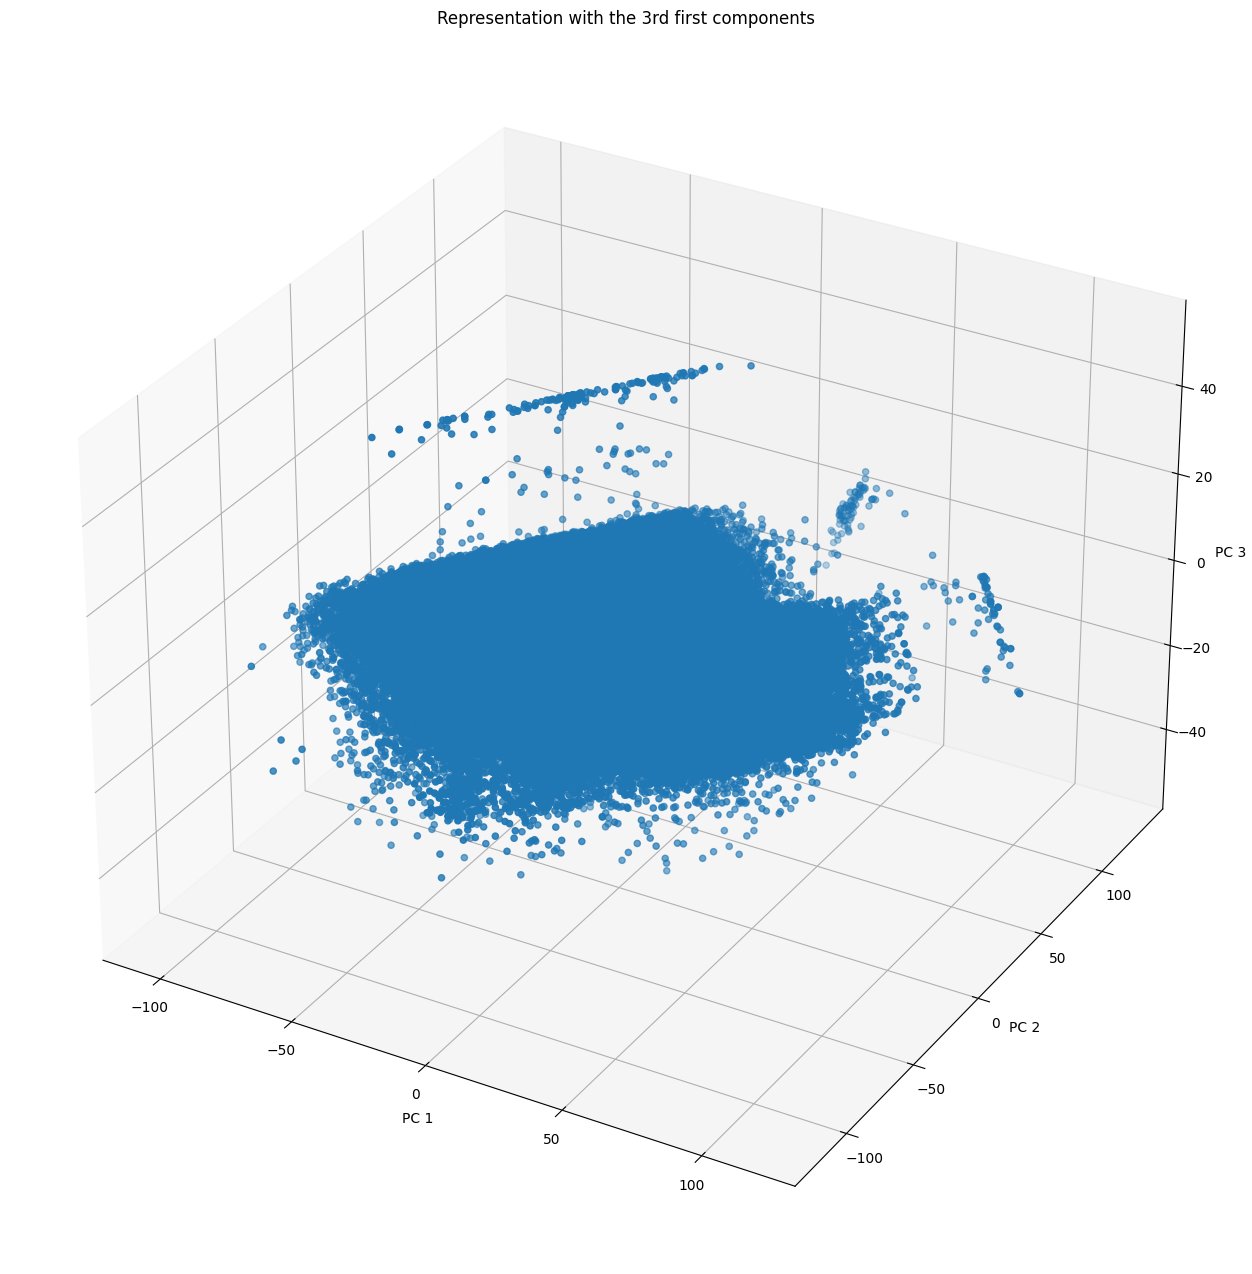

In [94]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Representation with the 3rd first components")
ax.scatter(pca_model[:, 0], pca_model[:, 1], pca_model[:, 2])
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()

### Other hypothesis

From df_origin_to_pca, we see that PCA 1 and PCA 2's coordinates are mostly expressed from tempo and year while PCA 3's coordinates are mostly expressed from year and popularity. 

Let us plot them and see if we got any insight

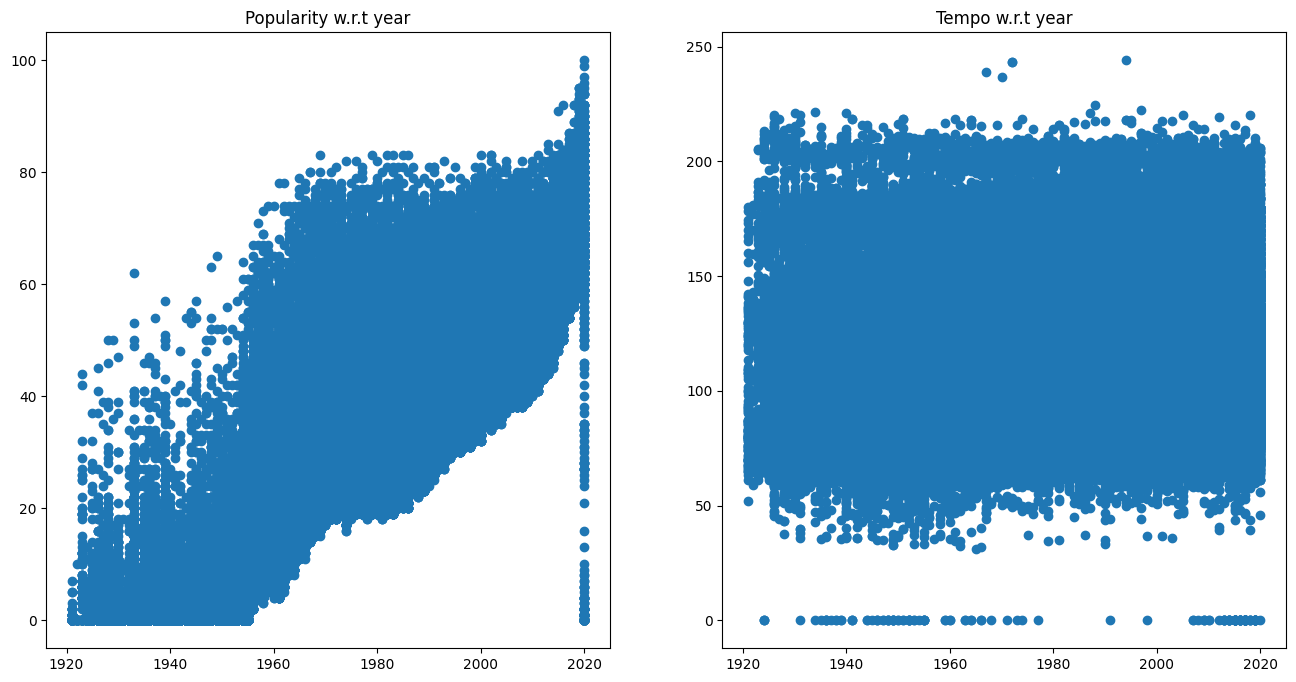

In [111]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
ax.scatter(x=new_df["year"], y=new_df["popularity"])
ax.set_title("Popularity w.r.t year")

ax2 = fig.add_subplot(122)
ax2.scatter(x=new_df["year"], y=new_df["tempo"])
ax2.set_title("Tempo w.r.t year")
plt.show()

So,it seems like year is strongly correlated to popularity and also that PCA 1&2 were probably representing songs with null tempo over the years

# Data Splitting

In order to train and test our models, we decided to split our dataset into train and testing data. Testing data will represent 30% of our dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# ***************** splitting ******************
df_train, df_test = train_test_split(new_df)

# reset indexes 
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.936000,'Chet Baker',0.650,171747,0.391,False,6JBk5C5vckBcSo2qwJvikq,0.618000,5,0.1070,-10.874,1,A Dandy Line - Remastered 2004,8,0.0584,124.110,0.803,1954
1,0.817000,'Chapuseaux y Damirón',0.543,140121,0.730,False,2FTCN2a7KqBmulAPlQCZWW,0.010400,8,0.2900,-8.582,1,Si Ella Se Deja,0,0.0611,99.977,0.842,1945
2,0.959000,'Banda Mochis De Porfirio Amarillas',0.547,149800,0.511,False,0mC4fpF1REAzpxWIWStuka,0.972000,5,0.1100,-10.241,1,La Rielera,0,0.0737,140.697,0.972,1951
3,0.035800,'Kim Gun Mo',0.726,258160,0.960,False,5xYps20oq3shRA3TZsSkPI,0.000064,3,0.0374,-3.429,0,Wrongful Meeting,37,0.0459,137.914,0.856,1995
4,0.024600,'P. Mobil',0.556,198973,0.633,False,6P7a2KqyzJhVZYpT2YTEpp,0.000002,9,0.1040,-10.227,1,Kétforintos dal,5,0.0330,141.461,0.727,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42473,0.000633,'Dead Prez',0.725,214067,0.737,True,2HoDr1yVksl19omOhc1zWy,0.004170,4,0.1090,-7.453,1,Hip Hop,63,0.3240,77.161,0.219,2000
42474,0.991000,"'Robert Schumann', 'Maryla Jonas'",0.442,38533,0.290,False,6e7nLYQavNoC1JdHfUeahF,0.913000,0,0.1640,-13.970,1,"Kinderszenen, Op. 15: 9. Ritter von Steckenpferd",0,0.0429,83.933,0.682,1946
42475,0.818000,'Flatt & Scruggs',0.551,163133,0.367,False,0gfeRtnxfwuBehrNtNxI8d,0.002090,8,0.2960,-11.574,1,"Jimmie Brown, The Newsboy",14,0.0281,110.368,0.903,1957
42476,0.209000,'FKJ',0.771,270405,0.488,False,6pYoZWwi4vi0MVr62S3KPv,0.044500,10,0.0726,-7.978,0,Instant Need,59,0.0473,91.031,0.568,2014


# Correlation between columns

After the findings of PCA, let us compute the pairwise Pearson correlation coefficient

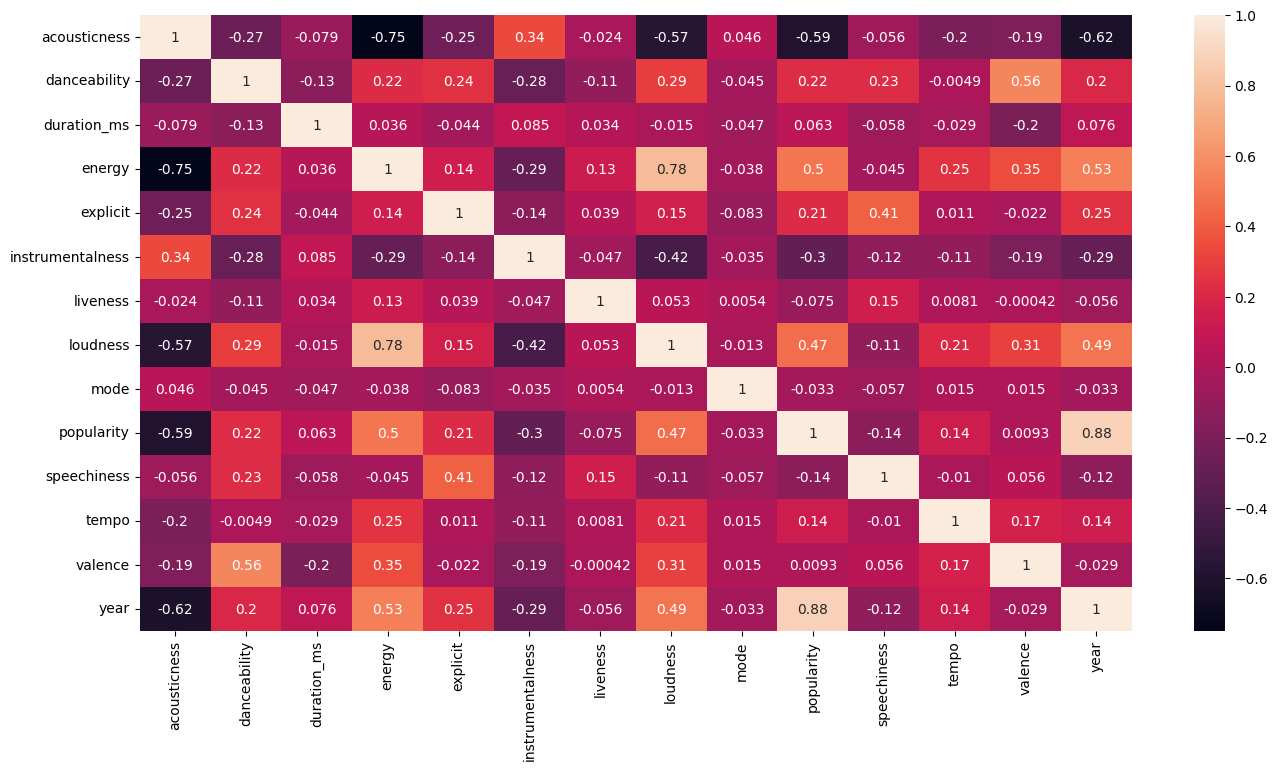

In [97]:
# compute the pairwise correlation coefficient between all the columns but name, artists, year, id, key
new_df2 = new_df.drop(columns=["name", "artists", "id", "key"])
plt.figure(figsize=(16, 8))
sns.heatmap(new_df2.corr(numeric_only=False), annot=True)
plt.show()

From this pairwise correlation, we have : 
- acousticness and energy are strongly correlated with r = -0.75
- acousticness is moderately correlated to loudness with r = -0.56
- acousticness and popularity are moderately correlated with r = -0.59
- danceability is moderately correlated to valence with r = 0.56
- energy is strongly correlated to loudness with r = 0.78
- popularity is moderately correlated to acousticness(-0.59) and strongly correlated to year(0.88)
- year is moderately correlated to acousticness(-0.62), energy(0.53) and strongly correlated to popularity(0.88)

From those observations, some questions pop up :
- will PCA be enough to visualize the underlying structure of those data ? In fact, 8/13 columns are pairwise correlated. And we know that PCA is based on the linear dependence of features. So, is there any linear dependence between all those data ?
- as we are focusing on the popularity of songs, will year and acousticness be enough to predict popularity.

# What makes you popular ?

We are interested on criteria that made an artist/a song popular.
On this purpose, we are going to build a linear regressor on the popularity. 
The process will be :
- start our study with the most correlated feature 
- choose the other features to take into consideration through feature extraction 

## Linear regressor

The features we'll use to build the regressor on popularity are : acousticness and year

### Regressor of popularity by year

We saw that popularity is mostly correlated to year.
So let's start with a simple linear regressor of popularity by year

#### Model

In [21]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)

# cross validation score
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model = LinearRegression()
scores = cross_val_score(model, year, popularity, cv=cv)
print(f"Cross validation score : {scores}")
print(f"We expect {scores.mean()*100} % accuracy with a standard deviation of {scores.std()}")

Cross validation score : [0.77274591 0.77883493 0.77667843 0.77893712 0.77922927]
We expect 77.72851315218193 % accuracy with a standard deviation of 0.002444716619909289


In [22]:
# our model
pop_model = LinearRegression().fit(year, popularity)

#### Visualization on the training data

The coefficient of determination is 0.7765056518663767


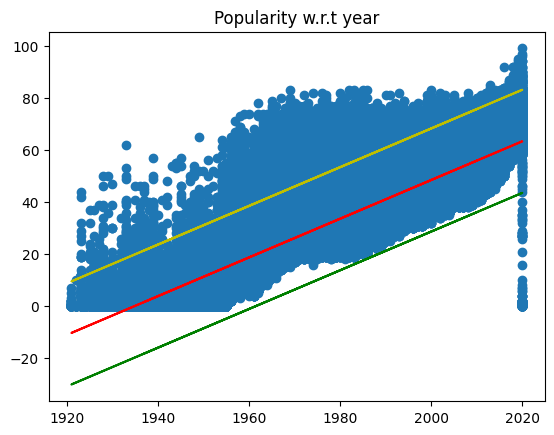

In [23]:
prediction = pop_model.predict(year)
score_simple_train = pop_model.score(year, popularity)
print(f"The coefficient of determination is {score_simple_train}")

# in the remainder, we will build a 95% confidence interval of the values of popularity

# 1. get the residuals
res = np.sum((prediction - popularity)**2)

# 2. get the standard deviation
std = np.sqrt(res/len(prediction)-2)

# 3. compute the interval
interval = std * 1.96

# 4. compute the lower and upperbounds of the interval
low, up = prediction - interval, prediction + interval

# plot the data
plt.scatter(year, popularity)
plt.plot(year, low, c="g")
plt.plot(year, prediction, c="r")
plt.plot(year, up, c="y")
plt.title("Popularity w.r.t year")
plt.show()

In [29]:
pop_model.coef_

array([[0.74271174]])

From the model above, we deduce that 77,55% of the popularity is explained by the year

#### Prediction on test data

Score on test data : 0.7731896770440921
Residual on test data : 4500061.775389843


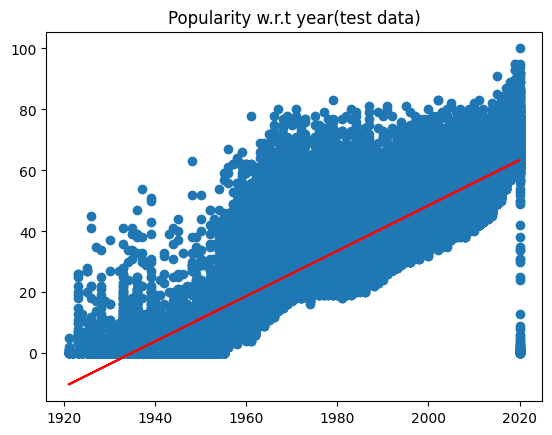

In [24]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)
prediction_test = pop_model.predict(year_test)
score_simple_test = pop_model.score(year_test, pop_test)
print(f"Score on test data : {score_simple_test}")
print(f"Residual on test data : {np.sum((prediction_test - pop_test)**2)}")

# plot the data
plt.scatter(year_test, pop_test)
plt.plot(year_test, prediction_test, c="r")
plt.title("Popularity w.r.t year(test data)")
plt.show()

### Polynomial regressor of popularity by year

Maybe the relation between popularity and year is polynomial.

So on this part, we want to know which degree of the polynomial is optimal, build a model from that polynomial representation and compare its score to the previous score we got.

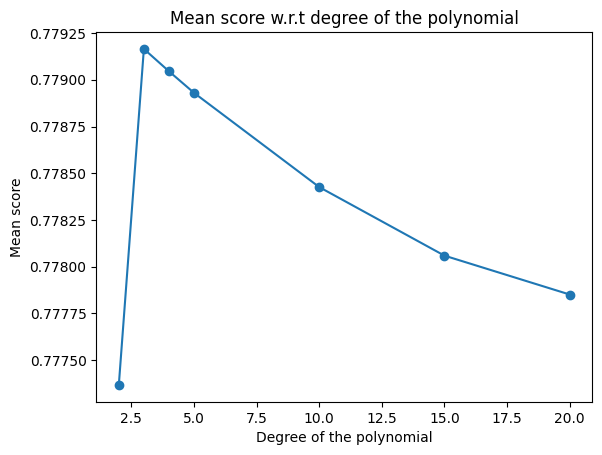

In [25]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)

# cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

degrees = [2, 3, 4, 5, 10, 15, 20]
all_scores = np.zeros(len(degrees))

for i in range(len(degrees)):
    x = PolynomialFeatures(degree=degrees[i]).fit_transform(year)
    score = cross_val_score(LinearRegression(), X=x, y=popularity, cv=cv)
    all_scores[i] = score.mean()

plt.plot(degrees, all_scores, marker='o')
plt.title("Mean score w.r.t degree of the polynomial")
plt.xlabel("Degree of the polynomial")
plt.ylabel("Mean score")
plt.show()


We see that the degree of polynomial with the highest mean cross-validation score is 3.

So, we will build year as a polynom of degree 3.

#### Model

In [26]:
# polynomial
year_poly = PolynomialFeatures(degree=3).fit_transform(year)

# our model
model = LinearRegression().fit(year_poly, popularity)

#### Visualization on training data

Coefficient of determination : 0.7783973306495517


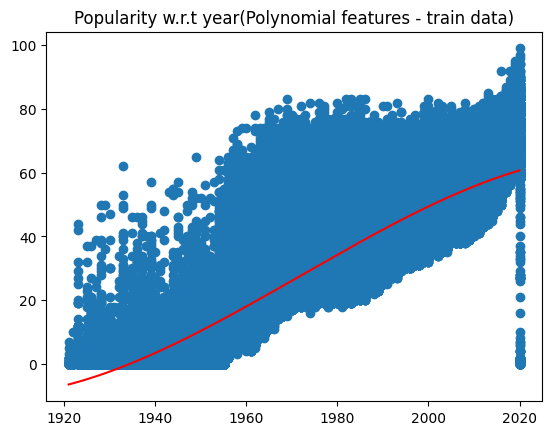

In [27]:
prediction = model.predict(year_poly)
score_poly_train = model.score(year_poly, popularity)
print(f"Coefficient of determination : {score_poly_train}")

# for a nice plot
stack = np.hstack((year, popularity, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year, popularity, prediction = np.hsplit(sorted_s, 3)

# plot
plt.scatter(year, popularity)
plt.plot(year, prediction, c="r")
plt.title("Popularity w.r.t year(Polynomial features - train data)")
plt.show()

#### Visualization on test data

Coefficient of determination : 0.7755980134296967


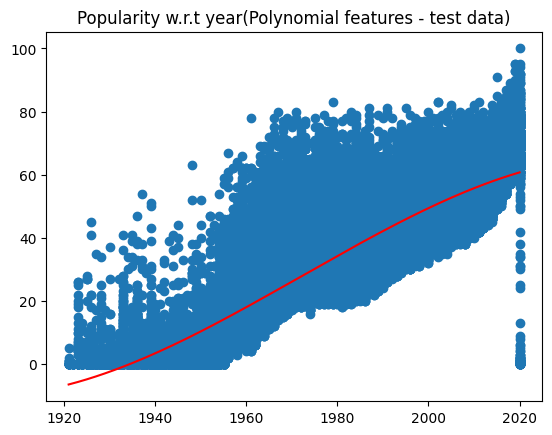

In [28]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)

# polynomial
year_test_poly = PolynomialFeatures(degree=3).fit_transform(year_test)

# prediction
prediction = model.predict(year_test_poly)
score_poly_test = model.score(year_test_poly, pop_test)
print(f"Coefficient of determination : {score_poly_test}")

# for a nice plot
stack = np.hstack((year_test, pop_test, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year_test, pop_test, prediction = np.hsplit(sorted_s, 3)

# plot
plt.scatter(year_test, pop_test)
plt.plot(year_test, prediction, c="r")
plt.title("Popularity w.r.t year(Polynomial features - test data)")
plt.show()

### Comparison of the scores

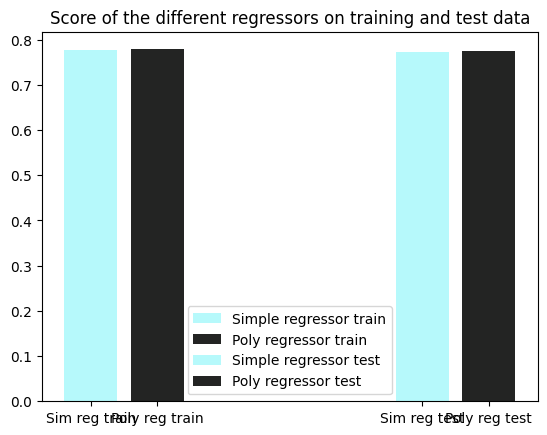

In [29]:
x = [1,2,6,7]
y = [score_simple_train, score_poly_train, score_simple_test, score_poly_test]
colors = ["#b6f9fb", "#232423", "#b6f9fb", "#232423"]
labels = ["Sim reg train", "Poly reg train", "Sim reg test", "Poly reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Simple regressor test", "Poly regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors on training and test data")
plt.legend()
plt.show()

The score is almost the same between the 02 models.

#### Multiple linear regressor model

When we look at our data, the curve described is like the square root plot. \
Let us build a multiple linear regressor model

##### Model

In [68]:
year = np.array(df_train["year"]).reshape(-1,1)
features = np.hstack((np.array(year), np.sqrt(np.array(year))))
popularity = np.array(df_train["popularity"]).reshape(-1, 1)
model = LinearRegression().fit(features, popularity)

##### Visualization on training data

Coefficient of determination : 0.7748765698430629
Residuals = 12472960.59859957


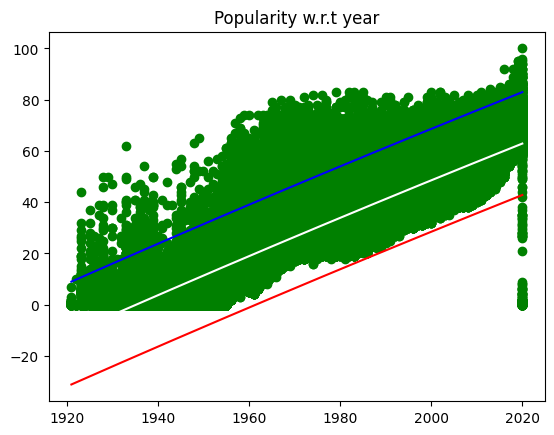

In [69]:
prediction = model.predict(features)
print(f"Coefficient of determination : {model.score(features, popularity)}")

# build a 95% confidence interval

# 1. residuals
res = np.sum((prediction - popularity)**2)
print(f"Residuals = {res}")

# To get a nice plot
stack = np.hstack((year, popularity, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year, popularity, prediction = np.hsplit(sorted_s, 3)

# 2. standard deviation
std = np.sqrt(res/(len(prediction)-2))

# 3. interval
interval = std * 1.96

# 4. lower and upperbounds
low, up = prediction - interval, prediction + interval

# Plotting
plt.scatter(year, popularity, c="g")
plt.plot(year, low, c="r")
plt.plot(year, prediction, c="white")
plt.plot(year, up, c="b")
plt.title("Popularity w.r.t year")
plt.show()

In [70]:
model.coef_

array([[ -2.24415823, 265.52598232]])

With this model, we observe a huge reduction of the residuals

### Linear regressor of popularity by year and acousticness

Popularity is moderately correlated to acousticness. \
The question is : if we use year and acousticness, can we get a better prediction of the popularity ? \
Is year only enough to predict the popularity ?

##### Model

In [30]:
year = np.array(df_train["year"]).reshape(-1, 1)
acous = np.array(df_train["acousticness"]).reshape(-1, 1)
pop = np.array(df_train["popularity"]).reshape(-1, 1)
features = np.hstack((year, acous))
mul_model = LinearRegression().fit(features, pop)

##### Visualization on training data

In [31]:
from mpl_toolkits.mplot3d import Axes3D

Coefficient of determination : 0.7794523201503547
Residuals = 13079375.817445012


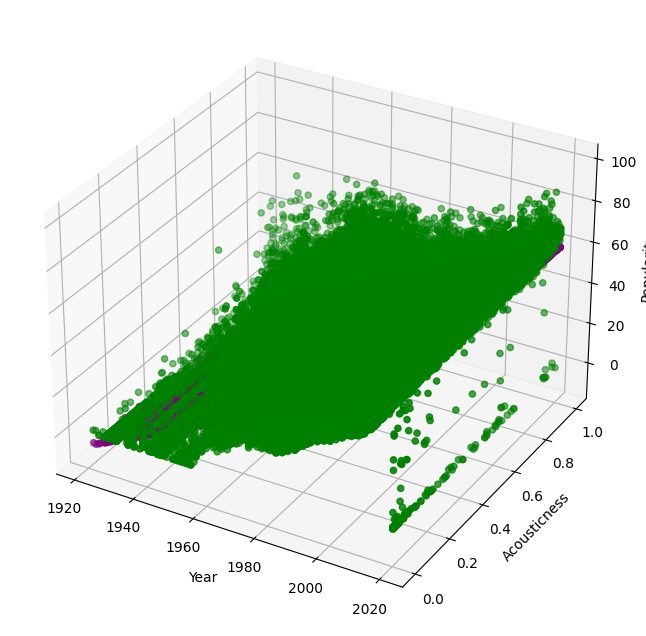

In [32]:
prediction = mul_model.predict(features)
print(f"Coefficient of determination : {mul_model.score(features, pop)}")

# build a 95% confidence interval

# 1. residuals 
res = np.sum((prediction - pop)**2)
print(f"Residuals = {res}")

# 2. standard deviation
std = np.sqrt(res/(len(prediction)-1))

# 3. interval
interval = std * 1.96

# 4. lower and upperbounds
low, up = prediction-interval, prediction+interval

# Plotting
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(year, acous, prediction, c="purple")
ax.scatter(year, acous, pop, c="g")
ax.set_xlabel("Year")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Popularity")
plt.show()

By adding acousticness, we don't have that much difference either on residuals or coefficient of determination.

### Multiple linear regression

On this section, we want to predict popularity using parameters other than year.

We should however notice that we have 13 numerical columns(without popularity) in our dataset. 

In other to build a not too complex model, we will perform feature extraction and only keep the most relevant features for the model.

In [58]:
df_train.shape

(127431, 18)

In [59]:
df_train.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [35]:
df_mult_regressor = df_train.drop(columns=["artists", "explicit", "id", "name"])

In [61]:
df_mult_regressor.shape

(127431, 14)

In [47]:
X = df_mult_regressor.drop(columns=["popularity"])
y = df_mult_regressor["popularity"]

In [48]:
print(X.shape)
y.shape

(127431, 13)


(127431,)

#### Preprocessing 

In [49]:
scaler = StandardScaler()

# take the numerical values
features = ["acousticness", "danceability", "duration_ms", "energy",
            "instrumentalness", "key", "liveness", "loudness",
            "speechiness", "tempo", "valence"]

X[features] = scaler.fit_transform(X[features])

X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
134502,-1.290925,1.505091,-0.511354,1.095082,2.148638,-1.479124,-0.338494,0.847879,1,-0.382753,0.260053,0.340446,2010
13234,-0.514118,1.043208,0.565017,1.387070,-0.519010,-1.194704,-1.031657,-0.544283,1,0.520522,0.866205,0.995795,1990
142642,-0.989497,0.290511,-0.514024,0.372600,-0.394384,1.365071,-0.157570,-0.338899,1,-0.405468,1.105726,1.056758,2004
165194,0.540216,-0.467889,0.144882,-0.391061,1.899322,1.365071,-0.355455,-0.629859,1,-0.390770,-1.106708,0.931022,1973
114736,-1.224797,1.716074,0.094690,0.571002,-0.522589,1.365071,-0.829249,1.005798,0,-0.055382,-0.651143,1.502547,2000


#### Find the optimal number of features

In [38]:
# cross-validation scheme
cv = KFold(shuffle=True, random_state=1)

# range for the number of features for selection
params = {"n_features_to_select" : list(range(1,13))}

model = LinearRegression()

# grid search
clf = GridSearchCV(
    estimator=RFE(model),
    param_grid=params,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

# fit the model
clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12]},
             return_train_score=True, scoring='r2')

In [39]:
print(f"Best parameters : {clf.best_params_}")

Best parameters : {'n_features_to_select': 11}


In [40]:
# let us visualize the result
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.446685,0.049194,0.002537,0.000366,1,{'n_features_to_select': 1},0.356424,0.348484,0.343867,0.353120,...,0.350928,0.004339,12,0.349592,0.351595,0.352735,0.350424,0.350535,0.350976,0.001086
1,0.426829,0.028574,0.004045,0.001751,2,{'n_features_to_select': 2},0.383904,0.380827,0.374023,0.383655,...,0.380004,0.003761,11,0.379104,0.379879,0.381575,0.379165,0.380677,0.380080,0.000940
2,0.444911,0.027100,0.007889,0.003918,3,{'n_features_to_select': 3},0.399690,0.396896,0.388918,0.400183,...,0.395662,0.004310,10,0.394736,0.395440,0.397428,0.394610,0.396500,0.395743,0.001077
3,0.384322,0.019739,0.006790,0.003077,4,{'n_features_to_select': 4},0.406644,0.402399,0.396162,0.407987,...,0.402425,0.004476,9,0.401464,0.402527,0.404083,0.401120,0.403388,0.402516,0.001120
4,0.386334,0.033836,0.006450,0.003832,5,{'n_features_to_select': 5},0.786080,0.783626,0.783937,0.785314,...,0.783936,0.001840,8,0.783428,0.784045,0.783970,0.783622,0.784763,0.783965,0.000458
5,0.363411,0.019558,0.006160,0.002717,6,{'n_features_to_select': 6},0.786622,0.784035,0.784543,0.785770,...,0.784400,0.001914,7,0.783877,0.784529,0.784404,0.784093,0.785269,0.784434,0.000476
6,0.337844,0.024744,0.007952,0.005145,7,{'n_features_to_select': 7},0.786585,0.784090,0.784577,0.785818,...,0.784432,0.001890,6,0.783929,0.784559,0.784440,0.784125,0.785298,0.784470,0.000471
7,0.334714,0.030213,0.006908,0.004336,8,{'n_features_to_select': 8},0.786592,0.784124,0.784581,0.785873,...,0.784462,0.001882,5,0.783966,0.784590,0.784478,0.784151,0.785326,0.784502,0.000468
8,0.287558,0.017172,0.008574,0.004176,9,{'n_features_to_select': 9},0.786561,0.784162,0.784605,0.785899,...,0.784475,0.001874,4,0.784030,0.784637,0.784529,0.784165,0.785345,0.784541,0.000460
9,0.281117,0.030321,0.013021,0.000672,10,{'n_features_to_select': 10},0.786559,0.784183,0.784597,0.785974,...,0.784510,0.001853,3,0.784049,0.784651,0.784555,0.784201,0.785376,0.784566,0.000461


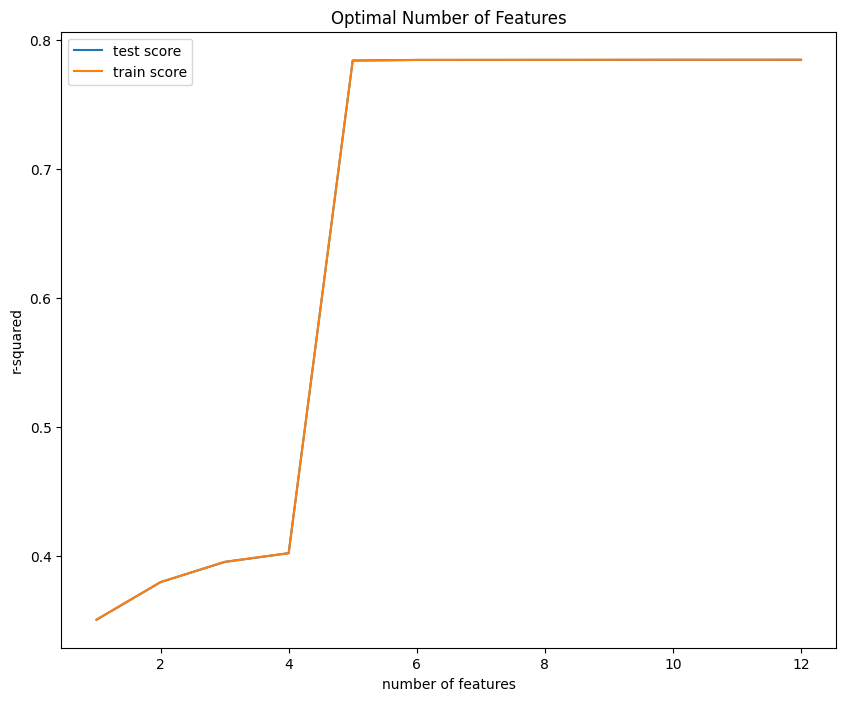

In [41]:
# plotting the results
plt.figure(figsize=(10,8))

plt.plot(results["param_n_features_to_select"], results["mean_test_score"])
plt.plot(results["param_n_features_to_select"], results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

The 02 plots are overlapping and we see that from 5 features, the score is pretty stable.

So, we're going to use 05 features for our model.

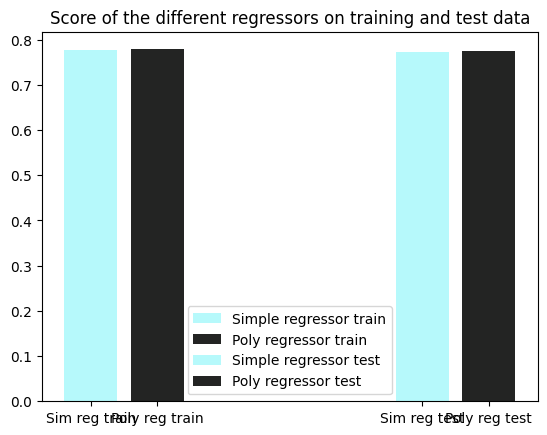

In [42]:
x = [1,2,6,7]
y = [score_simple_train, score_poly_train, score_simple_test, score_poly_test]
colors = ["#b6f9fb", "#232423", "#b6f9fb", "#232423"]
labels = ["Sim reg train", "Poly reg train", "Sim reg test", "Poly reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Simple regressor test", "Poly regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors on training and test data")
plt.legend()
plt.show()

In [51]:
# let us look at the selected features for nb_features = 5
model = LinearRegression()
model.fit(X=X, y=y)

feat_extrac = RFE(model, n_features_to_select=5)
feat_extrac = feat_extrac.fit(X, y)

list(zip(X.columns, feat_extrac.support_, feat_extrac.ranking_))

[('acousticness', True, 1),
 ('danceability', True, 1),
 ('duration_ms', False, 9),
 ('energy', False, 4),
 ('instrumentalness', True, 1),
 ('key', False, 8),
 ('liveness', False, 2),
 ('loudness', False, 5),
 ('mode', False, 3),
 ('speechiness', True, 1),
 ('tempo', False, 6),
 ('valence', False, 7),
 ('year', True, 1)]

The features selected are those with a ranking of 1. 

We then have : acousticness, danceability, instrumentalness, speechiness and year

#### Model

In [52]:
model = LinearRegression()
model.fit(X, y)

model_reduced = RFE(model, n_features_to_select=5)
model_reduced.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

#### Prediction on test data

In [90]:
df_test.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [53]:
# get test data
X_test = df_test.drop(columns=["artists", "explicit", "id", "name", "popularity"])
y_test = df_test["popularity"]

# scale the data
features = ["acousticness", "danceability", "duration_ms", "energy",
            "instrumentalness", "key", "liveness", "loudness",
            "speechiness", "tempo", "valence"]

X_test[features] = scaler.fit_transform(X_test[features])

pred = model_reduced.predict(X_test)

score = model_reduced.score(X_test, y_test) 

print(f"Coefficient of determination : {score}")

Coefficient of determination : 0.7810938864746328


In [54]:
score_train = model_reduced.score(X, y)
score_train

0.7839643503009204

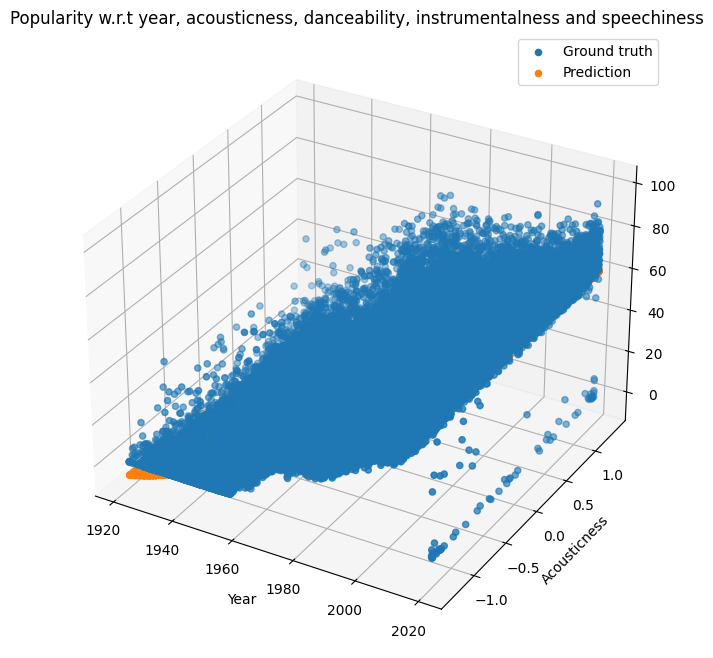

In [55]:
year = np.array(X_test["year"]).reshape(-1, 1)
popularity = np.array(y_test).reshape(-1, 1)
acous = np.array(X_test["acousticness"]).reshape(-1, 1)

# to get a nice plot
stack = np.hstack((year, popularity, pred.reshape(-1, 1)))
sorted_st = stack[np.argsort(stack[:,0])]
year, popularity, pred = np.hsplit(sorted_s, 3)


# plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(year, acous, popularity, label="Ground truth")
ax.scatter(year, acous, pred, label="Prediction")
ax.set_xlabel("Year")
ax.set_ylabel("Acousticness")
ax.set_title("Popularity w.r.t year, acousticness, danceability, instrumentalness and speechiness")
plt.legend()
plt.show()

### Final comparison of the scores

The aim of this section is to compare all our models in training and test data.

Also, this is the occasion to see if we have any underfitting or overfitting. And if so, we will build a regularized version.

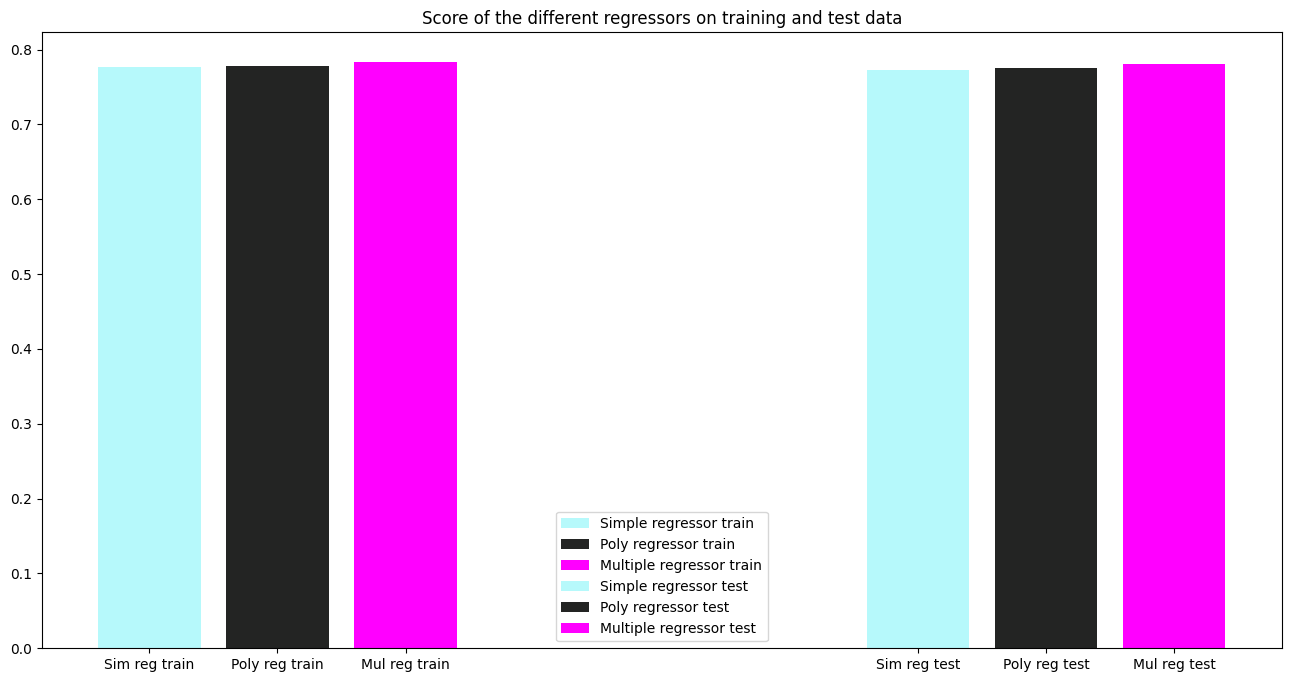

In [56]:
plt.figure(figsize=(16,8))
x = [1,2,3,7,8,9]
y = [score_simple_train, score_poly_train, score_train, score_simple_test, score_poly_test, score]
colors = ["#b6f9fb", "#232423", "#ff00ff", "#b6f9fb", "#232423", "#ff00ff"]
labels = ["Sim reg train", "Poly reg train", "Mul reg train", "Sim reg test", "Poly reg test", "Mul reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Multiple regressor train", "Simple regressor test", "Poly regressor test", 
        "Multiple regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors on training and test data")
plt.legend()
plt.show()

**Conclusion :** 
The multiple linear regressor is slightly better(training and test data) than the other regressors due to the other features(acousticness, danceability, instrumentalness and speechiness) it adds.

Also, we see that the score at test time is almost the same as the score at training time. So, there is no underfitting or overfitting. We could then trust our model.

That ends the study of a regressor model for popularity.

### Study of the popularity

#### Study based on different intervals of time

On this section, we are going to explore different intervals of time to see if we get features which are more correlated to popularity over these intervals.

Through that exploration, we would know which criteria made songs popular over time

Here a popular song is defined as having a score greater than 50

##### Search of features that are correlated with populariy

In [109]:
cor_df = new_df.drop(['artists', 'id', 'name',"explicit", "mode"], axis='columns')
X = new_df['year']
df_pop = pd.DataFrame(columns = ["year interval", "acousticness", "danceability", "duration_ms",
                                 "energy", "instrumentalness", "key", "liveness", "loudness", "popularity",
                                 "speechiness", "tempo", "valence", "year"])
for i in range(1928, 2020, 15):
    new_interval = cor_df[(X.between(i, i + 5)) & (cor_df['popularity'] > 50)]
    correlation_scores_5 = new_interval.corr(numeric_only=False)
    correlation_scores_5 = correlation_scores_5[(correlation_scores_5.iloc[:, 0: 19] >= 0.4) | (correlation_scores_5.iloc[:, 0: 19] <= -0.4)]
    pop = correlation_scores_5["popularity"].tolist()

    if i+ 5 > 2020:
        title = f'{i} - {i+5}'
        pop.insert(0, title)
        df_pop.loc[len(df_pop.index)] = pop

    else:
        next_interval = cor_df[(X.between(i+5, i+ 10)) & (cor_df['popularity'] > 50)]
        next_n_interval = cor_df[(X.between(i+10, i+ 15)) & (cor_df['popularity'] > 50)]

        correlation_scores_10 = next_interval.corr(numeric_only=False)
        correlation_scores_15 = next_n_interval.corr(numeric_only=False)

        correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_15 = correlation_scores_15[(correlation_scores_15.iloc[:, 0: 19] >= 0.4) | (correlation_scores_15.iloc[:, 0: 19] <= -0.4)]    
        
        pop = correlation_scores_5["popularity"].tolist() 
        pop1 = correlation_scores_10["popularity"].tolist() 
        pop2 = correlation_scores_15["popularity"].tolist() 
        title = f'{i} - {i+5}'
        title1 = f'{i+5} - {i+10}'
        title2 = f'{i+10} - {i+15}'
        pop.insert(0, title)
        pop1.insert(0, title1)
        pop2.insert(0, title2)
        df_pop.loc[len(df_pop.index)] = pop
        df_pop.loc[len(df_pop.index)] = pop1
        df_pop.loc[len(df_pop.index)] = pop2
        
df_pop.head()

,year interval,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,1928 - 1933,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.0,1.000000,-1.000000,1.000000,NaN
1,1933 - 1938,NaN,NaN,NaN,-0.468155,-0.403839,-0.927708,0.581691,-0.996341,1.0,NaN,NaN,NaN,-0.409644
2,1938 - 1943,0.831342,-0.714108,-0.501166,-0.796985,-0.865623,-0.960769,-0.999313,NaN,1.0,-0.976640,-0.934507,-0.473582,NaN
3,1943 - 1948,NaN,NaN,-0.624049,NaN,NaN,0.465262,0.600921,NaN,1.0,NaN,0.583302,NaN,NaN
4,1948 - 1953,NaN,NaN,NaN,NaN,0.419761,0.463750,NaN,-0.526004,1.0,0.669301,NaN,NaN,NaN


From the first results above, we see that intervals after 1950 don't have any feature correlated with popularity. Let's see if that changes when we increase the interval to 10 year intervals.

In [110]:
df_pop = pd.DataFrame(columns = ["year interval", "acousticness", "danceability", "duration_ms",
                                 "energy", "instrumentalness", "key", "liveness", "loudness", "popularity",
                                 "speechiness", "tempo", "valence", "year"])

for i in range(1928, 2020, 30):
    new_interval = cor_df[(X.between(i, i + 10)) & (cor_df['popularity'] > 50)]
    correlation_scores_10 = new_interval.corr()
    correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]
    pop = correlation_scores_10["popularity"].tolist()
    if i+ 10 > 2020:
        title = f'{i} - {i+10}'
        pop.insert(0, title)
        df_pop.loc[len(df_pop.index)] = pop

    else:
        next_interval = cor_df[(X.between(i+10, i+ 20)) & (cor_df['popularity'] > 50)]
        next_n_interval = cor_df[(X.between(i+20, i+ 30)) & (cor_df['popularity'] > 50)]

        correlation_scores_20 = next_interval.corr()
        correlation_scores_30 = next_n_interval.corr()

        correlation_scores_20 = correlation_scores_20[(correlation_scores_20.iloc[:, 0: 19] >= 0.4) | (correlation_scores_20.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_30 = correlation_scores_30[(correlation_scores_30.iloc[:, 0: 19] >= 0.4) | (correlation_scores_30.iloc[:, 0: 19] <= -0.4)]    
        
        pop = correlation_scores_20["popularity"].tolist() 
        pop1 = correlation_scores_30["popularity"].tolist() 
        title = f'{i+10} - {i+20}'
        title1 = f'{i+20} - {i+30}'
        pop.insert(0, title)
        pop1.insert(0, title1)
        df_pop.loc[len(df_pop.index)] = pop
        df_pop.loc[len(df_pop.index)] = pop1
        df_pop.loc[len(df_pop.index)] = pop2
    
df_pop.head()

,year interval,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,1938 - 1948,NaN,NaN,-0.544042,NaN,-0.42129,NaN,0.494983,NaN,1.0,-0.472676,NaN,NaN,NaN
1,1948 - 1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,2013 - 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.446969
3,1968 - 1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1978 - 1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


The same thing seems to be happening with no featue correlating with popularity (except itself) after 1948. Let's check the size of the interval and see if we get some insight.

##### Check the size of data in intervals

In [107]:
for i in range(1928, 2020, 10):
    # recall that we defined popularity by having a score greater than 50, so those are the songs that we are interested in
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] > 50)]
     
    print(f"{i} - {i+10}: {len(new_interval)}")

1928 - 1938: 3
1938 - 1948: 12
1948 - 1958: 120
1958 - 1968: 886
1968 - 1978: 2093
1978 - 1988: 2612
1988 - 1998: 4338
1998 - 2008: 8004
2008 - 2018: 16286
2018 - 2028: 5557


It appears that once the data is as large as 120, there are enough songs to determine that the popularity is not linearly correlated with any feature in an interval.

##### Find features that are correlated to popularity for unpopular songs

The results in the previous sections show that popularity is not strongly positively or negatively correlated with anything but itself. Since we can't find an indicator for what a popular song would have when data gets large, let's try finding an indicator for what a song that is not popular will have.

In [111]:
df_pop = pd.DataFrame(columns = ["year interval", "acousticness", "danceability", "duration_ms",
                                 "energy", "instrumentalness", "key", "liveness", "loudness", "popularity",
                                 "speechiness", "tempo", "valence", "year"])
for i in range(1928, 2020, 15):
    new_interval = cor_df[(X.between(i, i + 5)) & (cor_df['popularity'] < 50)]
    correlation_scores_5 = new_interval.corr()
    correlation_scores_5 = correlation_scores_5[(correlation_scores_5.iloc[:, 0: 19] >= 0.4) | (correlation_scores_5.iloc[:, 0: 19] <= -0.4)]
    pop = correlation_scores_5["popularity"].tolist()
    
    if i+ 5 > 2020:
        title = f'{i} - {i+5}'
        pop.insert(0, title)
        df_pop.loc[len(df_pop.index)] = pop

    else:
        next_interval = cor_df[(X.between(i+5, i+ 10)) & (cor_df['popularity'] < 50)]
        next_n_interval = cor_df[(X.between(i+10, i+ 15)) & (cor_df['popularity'] < 50)]

        correlation_scores_10 = next_interval.corr()
        correlation_scores_15 = next_n_interval.corr()

        correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_15 = correlation_scores_15[(correlation_scores_15.iloc[:, 0: 19] >= 0.4) | (correlation_scores_15.iloc[:, 0: 19] <= -0.4)]    
        
        pop1 = correlation_scores_10["popularity"].tolist() 
        pop2 = correlation_scores_15["popularity"].tolist() 
        title = f'{i} - {i+5}'
        title1 = f'{i+5} - {i+10}'
        title2 = f'{i+10} - {i+15}'
        pop.insert(0, title)
        pop1.insert(0, title1)
        pop2.insert(0, title2)
        df_pop.loc[len(df_pop.index)] = pop
        df_pop.loc[len(df_pop.index)] = pop1
        df_pop.loc[len(df_pop.index)] = pop2
        
df_pop.head()

,year interval,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,1928 - 1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1933 - 1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1938 - 1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,1943 - 1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1948 - 1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


This time, even the early intervals don't have features that correlate with popularity. Let's now try a 10 year interval.

In [112]:
df_pop = pd.DataFrame(columns = ["year interval", "acousticness", "danceability", "duration_ms",
                                 "energy", "instrumentalness", "key", "liveness", "loudness", "popularity",
                                 "speechiness", "tempo", "valence", "year"])
for i in range(1928, 2020, 30):
    new_interval = cor_df[(X.between(i, i + 10)) & (cor_df['popularity'] < 50)]
    correlation_scores_10 = new_interval.corr()
    correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]
    pop = correlation_scores_10["popularity"].tolist()
    
    if i+ 10 > 2020:
        title = f'{i} - {i+10}'
        pop.insert(0, title)
        df_pop.loc[len(df_pop.index)] = pop

    else:
        next_interval = cor_df[(X.between(i+10, i+ 20)) & (cor_df['popularity'] < 50)]
        next_n_interval = cor_df[(X.between(i+20, i+ 30)) & (cor_df['popularity'] < 50)]

        correlation_scores_20 = next_interval.corr()
        correlation_scores_30 = next_n_interval.corr()

        correlation_scores_20 = correlation_scores_20[(correlation_scores_20.iloc[:, 0: 19] >= 0.4) | (correlation_scores_20.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_30 = correlation_scores_30[(correlation_scores_30.iloc[:, 0: 19] >= 0.4) | (correlation_scores_30.iloc[:, 0: 19] <= -0.4)]    
        
        pop = correlation_scores_20["popularity"].tolist() 
        pop1 = correlation_scores_30["popularity"].tolist() 
        title = f'{i+10} - {i+20}'
        title1 = f'{i+20} - {i+30}'
        pop.insert(0, title)
        pop1.insert(0, title1)
        df_pop.loc[len(df_pop.index)] = pop
        df_pop.loc[len(df_pop.index)] = pop1
        df_pop.loc[len(df_pop.index)] = pop2
        
df_pop.head()

,year interval,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,1938 - 1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1948 - 1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.559809
2,2013 - 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,1968 - 1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1978 - 1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


#### Study of the most popular songs over years

##### Get those most popular songs

In [58]:
pivot = pd.pivot_table(
    data = new_df,
    values = ["popularity"],
    index = ["year"],
    aggfunc= {"popularity" : np.max}
)

In [6]:
pivot

,popularity
year,
1921,7
1922,10
1923,44
1924,13
1925,37
...,...
2016,92
2017,87
2018,92


In [59]:
df_pivot = pd.merge(left=df, right=pivot, on=["year","popularity"], how="inner")

In [60]:
df_pivot.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,'Dennis Day',0.819,180533,0.3410,False,7xPhfUan2yNtyFG0cUWkt8,0.00000,7,0.160,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.963,1921
1,0.674,'Uli',0.645,126903,0.4450,False,35iwgR4jXetI318WEWsa1Q,0.74400,0,0.151,-13.338,1,Carve,10,1922-02-22,0.4510,104.851,0.127,1922
2,0.996,'Bessie Smith',0.614,177133,0.0423,False,2wAfHM7Whz67VFbdanhZlk,0.00293,4,0.183,-12.033,1,Nobody Knows You When You're Down and Out,44,1923,0.0535,89.822,0.211,1923
3,0.816,"'Paul Whiteman & His Orchestra', 'Bix Beiderbe...",0.678,206000,0.3950,False,59UEylF5pnWCXm91Hzk2Q9,0.24000,3,0.100,-9.825,1,Mississippi Mud (feat. Bix Beiderbecke),13,1924,0.1330,184.446,0.832,1924
4,0.969,'Tommy Dorsey',0.678,194320,0.1750,False,3XDharvL8vEyxdQwOQKmww,0.00105,3,0.177,-13.021,1,"On the Sunny Side of the Street (From ""Is Ever...",37,1925,0.0301,112.941,0.580,1925


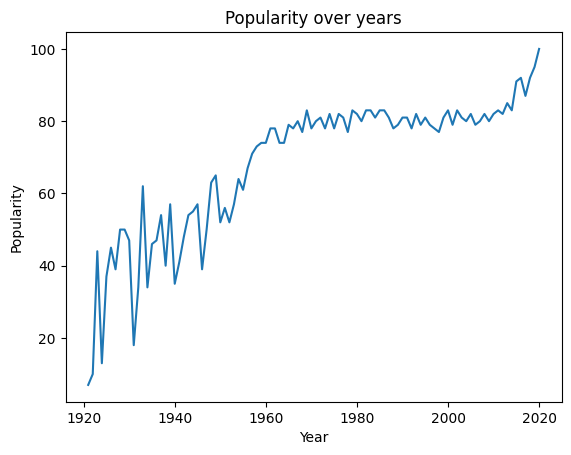

In [61]:
plt.title("Popularity over years")
plt.plot(df_pivot["year"], df_pivot["popularity"])
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

##### Exploration of the dataframe

On this part, we'll analyze values of acousticness, danceability, instrumentalness and speechiness.

In [14]:
df_pivot.head(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.963,1921
1,0.674,['Uli'],0.645,126903,0.4450,0,35iwgR4jXetI318WEWsa1Q,0.744000,0,0.1510,-13.338,1,Carve,10,1922-02-22,0.4510,104.851,0.127,1922
2,0.996,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.1830,-12.033,1,Nobody Knows You When You're Down and Out,44,1923,0.0535,89.822,0.211,1923
3,0.816,"['Paul Whiteman & His Orchestra', 'Bix Beiderb...",0.678,206000,0.3950,0,59UEylF5pnWCXm91Hzk2Q9,0.240000,3,0.1000,-9.825,1,Mississippi Mud (feat. Bix Beiderbecke),13,1924,0.1330,184.446,0.832,1924
4,0.969,['Tommy Dorsey'],0.678,194320,0.1750,0,3XDharvL8vEyxdQwOQKmww,0.001050,3,0.1770,-13.021,1,"On the Sunny Side of the Street (From ""Is Ever...",37,1925,0.0301,112.941,0.580,1925
5,0.821,['Fats Waller'],0.515,237773,0.2220,0,3BFRqZFLSrqtQr6cjHbAxU,0.001930,0,0.1900,-16.918,0,Ain't Misbehavin',45,1926,0.0575,98.358,0.350,1926
6,0.990,['Bix Beiderbecke'],0.709,180027,0.2080,0,1YLxMRyib15FfONoTod5TV,0.796000,0,0.0831,-12.245,0,Singin' The Blues,39,1927,0.0828,132.245,0.819,1927
7,0.847,['Benny Goodman'],0.626,520133,0.7440,0,61znp1Iy11bdJ2YAbwaqw7,0.892000,2,0.1450,-9.189,0,"Sing, Sing, Sing",50,1928,0.0662,113.117,0.259,1928
8,0.586,['Louis Armstrong'],0.673,201467,0.3770,0,0RNxWy0PC3AyH4ThH3aGK6,0.000000,0,0.3320,-14.141,1,Mack the Knife,50,1929,0.0697,88.973,0.713,1929
9,0.987,"['Franz Liszt', 'Vladimir Horowitz']",0.349,541600,0.3260,0,7CIoJE0JfVFcmmUY3fFojH,0.886000,1,0.7840,-15.347,1,"Hungarian Rhapsody No. 2 in C-Sharp Minor, S. ...",47,1930,0.0551,80.233,0.168,1930


In [18]:
df_pivot.iloc[20:50, :]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20,0.9450,['Peggy Lee'],0.794,190573,0.1740,0,6YSqgWIvzhQsnCeYwWde2s,0.007250,7,0.2760,-13.544,0,On the Sunny Side of the Street,41,1941,0.0388,121.843,0.6560,1941
21,0.6730,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",0.317,177480,0.1580,0,4so0Wek9Ig1p6CRCHuINwW,0.353000,9,0.3380,-16.485,1,White Christmas,48,1942-01-01,0.0381,130.503,0.2470,1942
22,0.9470,['Frank Sinatra'],0.204,198000,0.1510,0,2W889aLIKxULEefrleFBFI,0.000009,2,0.3210,-17.842,1,Someone to Watch Over Me,54,1943,0.0418,91.783,0.1340,1943
23,0.9840,['Frank Sinatra'],0.295,199000,0.0826,0,4Pnzw1nLOpDNV6MKI5ueIR,0.000358,1,0.1560,-19.569,1,Nancy (With the Laughing Face) - 78rpm Version,55,1944,0.0367,128.600,0.1690,1944
24,0.8400,['Frank Sinatra'],0.561,163000,0.3350,0,7GLmfKOe5BfOXk7334DoKt,0.000002,9,0.7880,-11.093,0,Saturday Night (Is The Loneliest Night In The ...,55,1944,0.0499,126.974,0.5900,1944
25,0.9810,"['Doris Day', 'The Mellomen']",0.495,167907,0.0209,0,0qB213IfGN0JXXm9aRjldF,0.000001,3,0.0753,-21.329,1,Again (with The Mellomen),57,1945,0.0348,62.588,0.1450,1945
26,0.8290,['Dizzy Gillespie'],0.616,186693,0.6700,0,6KpMB0Wgw1NVFqwn0DCprf,0.850000,5,0.1060,-8.714,0,Manteca,39,1946,0.2440,87.096,0.5520,1946
27,0.4070,['Willie Dixon'],0.469,399173,0.2360,0,2PcbVKT28p9mOlWBDL371J,0.043400,7,0.2150,-16.981,1,I Can't Quit You Baby,50,1947,0.0364,82.232,0.4150,1947
28,0.8640,"['Doris Day', 'Frank DeVol & His Orchestra']",0.416,123360,0.3410,0,6yhLR2sVn1IfsScVrR4ocr,0.000000,9,0.7240,-10.749,1,"Whatever Will Be, Will Be (Que Sera, Sera) (wi...",63,1948,0.0391,177.229,0.7760,1948
29,0.9940,"['Erik Satie', 'Philippe Entremont']",0.469,205867,0.0128,0,5NGtFXVpXSvwunEIGeviY3,0.937000,7,0.0941,-36.856,1,Gymnopédie No. 1,65,1949,0.1190,72.765,0.3540,1949


In [8]:
df_pivot.iloc[50:70, :]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
50,0.43000,"['Marvin Gaye', 'Tammi Terrell']",0.663,151667,0.600,0,7tqhbajSfrz2F7E1Z75ASX,0.000000,7,0.1840,-10.870,1,Ain't No Mountain High Enough,80,1967-08-29,0.0320,129.991,0.800,1967
51,0.00255,['Jimi Hendrix'],0.438,240800,0.805,0,2aoo2jlRnM3A0NyLQqMN2f,0.000057,8,0.0842,-6.237,1,All Along the Watchtower,77,1968-10-25,0.0624,113.253,0.564,1968
52,0.03390,['The Beatles'],0.557,185733,0.540,0,6dGnYIeXmHdcikdzNNDMm2,0.002480,9,0.1790,-10.484,1,Here Comes The Sun - Remastered 2009,83,1969-09-26,0.0347,129.171,0.394,1969
53,0.63100,['The Beatles'],0.443,243027,0.403,0,7iN1s7xHE4ifF5povM6A48,0.000000,0,0.1110,-8.339,1,Let It Be - Remastered 2009,78,1970-05-08,0.0322,143.462,0.410,1970
54,0.38200,['Elton John'],0.414,377093,0.428,0,2TVxnKdb3tqe1nhQWwwZCO,0.000243,0,0.1480,-11.097,1,Tiny Dancer,80,1971-11-05,0.0278,145.075,0.282,1971
55,0.43200,['Elton John'],0.601,281613,0.532,0,3gdewACMIVMEWVbyb8O9sY,0.000006,10,0.0925,-9.119,1,"Rocket Man (I Think It's Going To Be A Long, L...",81,1972-05-19,0.0286,136.571,0.341,1972
56,0.38800,['Aerosmith'],0.307,266960,0.433,0,5MxNLUsfh7uzROypsoO5qe,0.000091,1,0.3320,-10.057,1,Dream On,78,1973-01-05,0.0290,160.900,0.224,1973
57,0.18100,['Lynyrd Skynyrd'],0.596,283800,0.605,0,7e89621JPkKaeDSTQ3avtg,0.000331,7,0.0863,-12.145,1,Sweet Home Alabama,82,1974-04-15,0.0255,97.798,0.886,1974
58,0.88300,['Fleetwood Mac'],0.414,199493,0.161,0,5ihS6UUlyQAfmp48eSkxuQ,0.000223,7,0.1170,-22.320,0,Landslide,78,1975-07-11,0.0318,159.375,0.423,1975
59,0.00574,['Eagles'],0.579,391376,0.508,0,40riOy7x9W7GXjyGp4pjAv,0.000494,2,0.0575,-9.484,1,Hotel California - 2013 Remaster,82,1976-12-08,0.0270,147.125,0.609,1976


In [9]:
df_pivot.iloc[70:90, :]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
70,0.077800,['Bon Jovi'],0.532,249293,0.887,0,37ZJ0p5Jm13JPevGcx4SkF,0.000214,0,0.2940,-3.757,1,Livin' On A Prayer,83,1986-08-16,0.0335,122.511,0.795,1986
71,0.207000,['Whitney Houston'],0.709,291293,0.824,0,2tUBqZG2AbRi7Q0BIrVrEj,0.000307,1,0.0888,-8.824,1,I Wanna Dance with Somebody (Who Loves Me),81,1987-06-02,0.0453,118.814,0.867,1987
72,0.313000,['Tracy Chapman'],0.711,296800,0.292,0,2M9ro2krNb7nr7HSprkEgo,0.000000,4,0.1310,-15.523,0,Fast Car,78,1988-04-05,0.0370,103.951,0.194,1988
73,0.212000,['Tom Petty'],0.623,256000,0.449,0,5tVA6TkbaAH9QMITTQRrNv,0.000000,5,0.0613,-13.333,1,Free Fallin',79,1989-01-01,0.0253,84.383,0.572,1989
74,0.000147,['AC/DC'],0.501,292880,0.889,0,57bgtoPSgt236HzfBOd8kj,0.011400,4,0.2170,-5.175,1,Thunderstruck,81,1990-09-24,0.0364,133.519,0.257,1990
75,0.057600,['Red Hot Chili Peppers'],0.559,264307,0.345,0,3d9DChrdc6BOeFsbrZ3Is0,0.000105,4,0.1410,-13.496,1,Under the Bridge,81,1991-09-24,0.0459,84.581,0.458,1991
76,0.179000,['R.E.M.'],0.666,268427,0.855,0,31AOj9sFz2gM0O3hMARRBx,0.000001,9,0.0987,-5.051,0,Losing My Religion,81,1991-03-12,0.0295,125.639,0.803,1991
77,0.026600,['Rage Against The Machine'],0.466,313573,0.833,1,59WN2psjkt1tyaxjspN8fp,0.000000,7,0.0327,-4.215,1,Killing In The Name,78,1992,0.3040,88.785,0.661,1992
78,0.161000,['4 Non Blondes'],0.565,295533,0.564,0,0jWgAnTrNZmOGmqgvHhZEm,0.000000,2,0.1140,-10.044,1,What's Up?,78,1992-01-01,0.0292,134.355,0.454,1992
79,0.010200,['Radiohead'],0.515,238640,0.430,1,6b2oQwSGFkzsMtQruIWm2p,0.000141,7,0.1290,-9.935,1,Creep,82,1993-02-22,0.0369,91.841,0.104,1993


In [13]:
df_pivot.tail(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
96,0.11600,['Red Hot Chili Peppers'],0.427,334667,0.900,0,2aibwv5hGXSgw7Yru8IYTO,0.000017,11,0.1190,-3.674,1,Snow (Hey Oh),79,2006-05-09,0.0499,104.655,0.599,2006
97,0.00564,['Kanye West'],0.617,311867,0.717,1,4fzsfWzRhPawzqhX8Qt9F3,0.000000,10,0.4080,-7.858,0,Stronger,80,2007-09-11,0.1530,103.992,0.490,2007
98,0.59500,['Jason Mraz'],0.686,242187,0.457,0,1EzrEOXmMH3G43AXT1y7pA,0.000000,11,0.1050,-8.322,1,I'm Yours,82,2008-05-12,0.0468,150.953,0.718,2008
99,0.00314,['Lady Gaga'],0.696,294573,0.921,1,0SiywuOBRcynK0uKGWdCnn,0.000052,0,0.0842,-3.755,1,Bad Romance,80,2009-11-05,0.0363,119.001,0.714,2009
100,0.18500,['Train'],0.673,216773,0.886,0,4HlFJV71xXKIGcU3kRyttv,0.000000,1,0.0826,-4.440,0,"Hey, Soul Sister",82,2010-12-01,0.0431,97.012,0.795,2010
101,0.14500,['Foster The People'],0.733,239600,0.710,0,7w87IxuO7BDcJ3YUqCyMTT,0.115000,5,0.0956,-5.849,0,Pumped Up Kicks,83,2011-05-23,0.0292,127.975,0.965,2011
102,0.93200,['Bruno Mars'],0.612,213827,0.280,0,0nJW01T7XtvILxQgC5J7Wh,0.000000,0,0.0880,-8.648,1,When I Was Your Man,82,2012-12-07,0.0434,72.795,0.387,2012
103,0.02910,['Macklemore & Ryan Lewis'],0.641,258343,0.922,0,3bidbhpOYeV4knp8AIu8Xn,0.000000,2,0.0862,-4.457,1,Can't Hold Us - feat. Ray Dalton,82,2012-10-09,0.0786,146.078,0.847,2012
104,0.92200,['John Legend'],0.422,269560,0.264,0,3U4isOIWM3VvDubwSI3y7a,0.000000,8,0.1320,-7.064,1,All of Me,85,2013-08-30,0.0322,119.930,0.331,2013
105,0.60700,['Ed Sheeran'],0.614,258987,0.379,0,1HNkqx9Ahdgi1Ixy2xkKkL,0.000464,4,0.0986,-10.480,1,Photograph,83,2014-06-21,0.0476,107.989,0.201,2014


What we observe is that :
- between 1921 and 1941, the acousticness is most of the time greater than 0.7, the danceability is between 0.4 and 0.7, the instrumentalness is less than 0.1 and the speechiness is less than 0.1

- between 1942 and 1965, the acousticness is most of the time greater than 0.6, the danceability is between 0.3 and 0.5, the instrumentalness is less than 0.1 and the speechiness is less than 0.1

- between 1942 and 1965, the acousticness starts to be less than 0.4, the danceability is between 0.3 and 0.6, the instrumentalness is less than 0.1 and the speechiness is less than 0.1

- from 1999 to 2020, the acousticness decreases again to be less than 0.3, the danceability increases, being greater than 0.5, the instrumentalness is less than 0.1 and the speechiness is less than 0.1

When we read the blog whose link is https://www.musicindustryhowto.com/elements-of-music/ and compare it to what we observe on this dataset, the results are almost different. Even though they are right about melody(or acousticness), it turns out that now, people are also looking for dancing performance in the songs.

# Guess my year

On this section, we want to know if we can predict the year from the variables

## Linear regressor

### Regression of year by popularity

Year is strongly correlated to popularity. So let us start by make a regressor of year using popularity

#### Model

In [62]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)

# cross validation score
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model = LinearRegression()
scores = cross_val_score(model, popularity, year, cv=cv)
print(f"Cross validation score : {scores}")
print(f"We expect {scores.mean()*100} % accuracy with a standard deviation of {scores.std()}")

Cross validation score : [0.77274534 0.77880422 0.77668155 0.77893227 0.77921631]
We expect 77.72759362506572 % accuracy with a standard deviation of 0.002438185111016621


#### Visualization on training data

The coefficient of determination is 0.7765056518663765


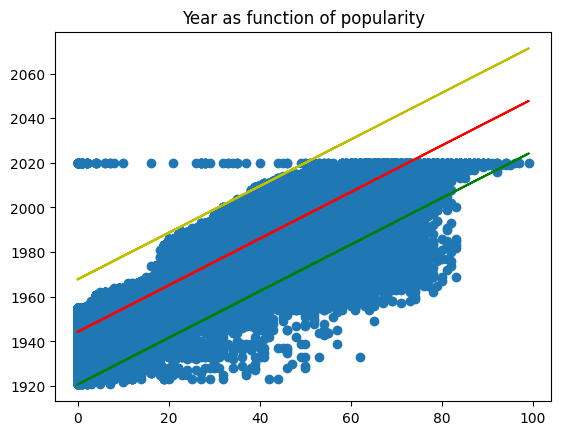

In [63]:
# our model
model = LinearRegression().fit(popularity, year)

prediction = model.predict(popularity)
score_simple_train = model.score(popularity, year)
print(f"The coefficient of determination is {score_simple_train}")

# in the remainder, we will build a 95% confidence interval of the values of popularity

# 1. get the residuals
res = np.sum((prediction - year)**2)

# 2. get the standard deviation
std = np.sqrt(res/len(prediction)-2)

# 3. compute the interval
interval = std * 1.96

# 4. compute the lower and upperbounds of the interval
low, up = prediction - interval, prediction + interval

# plot the data
plt.scatter(popularity, year)
plt.plot(popularity, low, c="g")
plt.plot(popularity, prediction, c="r")
plt.plot(popularity, up, c="y")
plt.title("Year as function of popularity")
plt.show()

#### Prediction on test data

Score on test data : 0.7731996597559162
Residual on test data : 6342095.34640053


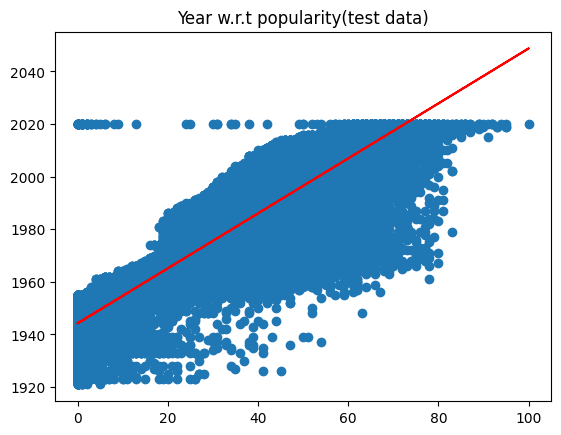

In [64]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)
prediction_test = model.predict(pop_test)
score_simple_test = model.score(pop_test, year_test)
print(f"Score on test data : {score_simple_test}")
print(f"Residual on test data : {np.sum((prediction_test - year_test)**2)}")

# plot the data
plt.scatter(pop_test, year_test)
plt.plot(pop_test, prediction_test, c="r")
plt.title("Year w.r.t popularity(test data)")
plt.show()

### Polynomial regressor of year by popularity

As with regressor of popularity, let us try to build year as a polynomial of popularity

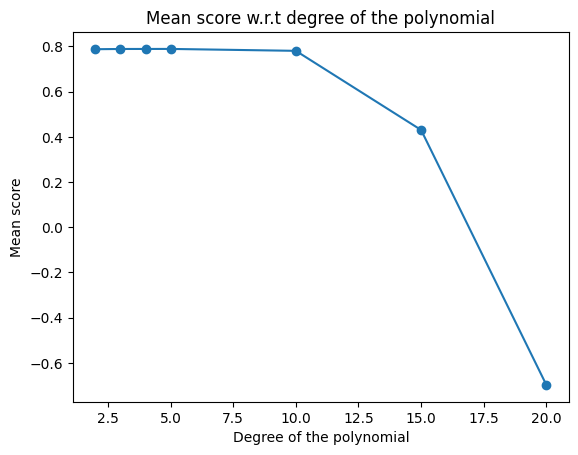

In [65]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)

# cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

degrees = [2, 3, 4, 5, 10, 15, 20]
all_scores = np.zeros(len(degrees))

for i in range(len(degrees)):
    x = PolynomialFeatures(degree=degrees[i]).fit_transform(popularity)
    score = cross_val_score(LinearRegression(), X=x, y=year, cv=cv)
    all_scores[i] = score.mean()

plt.plot(degrees, all_scores, marker='o')
plt.title("Mean score w.r.t degree of the polynomial")
plt.xlabel("Degree of the polynomial")
plt.ylabel("Mean score")
plt.show()


We'll use a degree 2 polynomial

#### Model

In [66]:
# polynomial
pop_poly = PolynomialFeatures(degree=2).fit_transform(popularity)

# our model
model = LinearRegression().fit(pop_poly, year)

#### Visualization on training data

Coefficient of determination : 0.7872999836062018


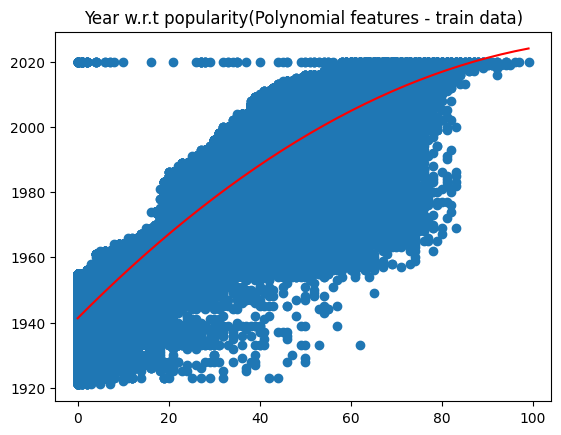

In [67]:
prediction = model.predict(pop_poly)
score_poly_train = model.score(pop_poly, year)
print(f"Coefficient of determination : {score_poly_train}")

# for a nice plot
stack = np.hstack((popularity, year,prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
popularity, year, prediction = np.hsplit(sorted_s, 3)

# plot
plt.scatter(popularity, year)
plt.plot(popularity, prediction, c="r")
plt.title("Year w.r.t popularity(Polynomial features - train data)")
plt.show()

We get a better coefficient of determination with more than 78% of variation in year being explained by popularity

#### Visualization on test data

Coefficient of determination : 0.7838576110694524


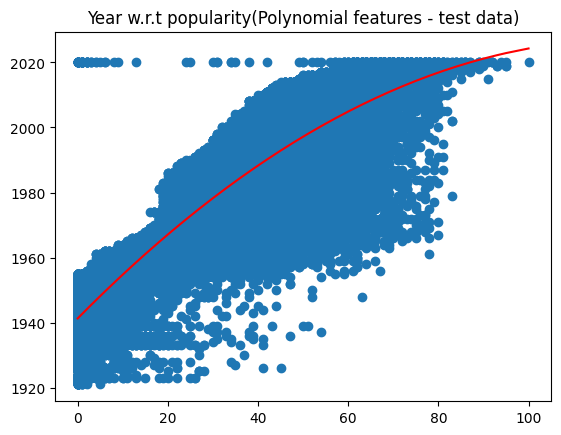

In [68]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)

# polynomial
pop_test_poly = PolynomialFeatures(degree=2).fit_transform(pop_test)

# prediction
prediction = model.predict(pop_test_poly)
score_poly_test = model.score(pop_test_poly, year_test)
print(f"Coefficient of determination : {score_poly_test}")

# for a nice plot
stack = np.hstack((pop_test, year_test, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
pop_test, year_test, prediction = np.hsplit(sorted_s, 3)

# plot
plt.scatter(pop_test, year_test)
plt.plot(pop_test, prediction, c="r")
plt.title("Year w.r.t popularity(Polynomial features - test data)")
plt.show()

### Multiple linear regression

On this section, we'll see if by adding other features, we get a better prediction of year

#### Preprocessing

In [69]:
X = df_mult_regressor.drop(columns=["year"])
y = df_mult_regressor["year"]

scaler = StandardScaler()

# take the numerical values
features = ["acousticness", "danceability", "duration_ms", "energy",
            "instrumentalness", "key", "liveness", "loudness",
            "speechiness", "tempo", "valence"]

X[features] = scaler.fit_transform(X[features])

X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
134502,-1.290925,1.505091,-0.511354,1.095082,2.148638,-1.479124,-0.338494,0.847879,1,62,-0.382753,0.260053,0.340446
13234,-0.514118,1.043208,0.565017,1.387070,-0.519010,-1.194704,-1.031657,-0.544283,1,49,0.520522,0.866205,0.995795
142642,-0.989497,0.290511,-0.514024,0.372600,-0.394384,1.365071,-0.157570,-0.338899,1,48,-0.405468,1.105726,1.056758
165194,0.540216,-0.467889,0.144882,-0.391061,1.899322,1.365071,-0.355455,-0.629859,1,34,-0.390770,-1.106708,0.931022
114736,-1.224797,1.716074,0.094690,0.571002,-0.522589,1.365071,-0.829249,1.005798,0,52,-0.055382,-0.651143,1.502547


#### Find the optimal number of features

In [70]:
# cross-validation scheme
cv = KFold(shuffle=True, random_state=1)

# range for the number of features for selection
params = {"n_features_to_select" : list(range(1,13))}

model = LinearRegression()

# grid search
clf = GridSearchCV(
    estimator=RFE(model),
    param_grid=params,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

# fit the model
clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12]},
             return_train_score=True, scoring='r2')

In [71]:
print(f"Best parameters : {clf.best_params_}")

Best parameters : {'n_features_to_select': 11}


In [72]:
# let us visualize the result
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.406728,0.062141,0.002575,0.000431,1,{'n_features_to_select': 1},0.394095,0.386161,0.382660,0.392360,...,0.389556,0.004387,12,0.388467,0.390450,0.391313,0.388883,0.388868,0.389596,0.001095
1,0.422286,0.009509,0.007408,0.002345,2,{'n_features_to_select': 2},0.421153,0.414555,0.408876,0.422999,...,0.416872,0.005004,11,0.415888,0.417537,0.418943,0.415394,0.416978,0.416948,0.001254
2,0.413555,0.030766,0.006500,0.002123,3,{'n_features_to_select': 3},0.460371,0.453240,0.447096,0.458599,...,0.455238,0.004704,10,0.454045,0.455829,0.457351,0.454459,0.454913,0.455319,0.001176
3,0.438508,0.050657,0.011692,0.006771,4,{'n_features_to_select': 4},0.477566,0.468822,0.463895,0.476302,...,0.471769,0.005002,9,0.470421,0.472607,0.473827,0.470703,0.471740,0.471860,0.001253
4,0.366742,0.006575,0.006946,0.003115,5,{'n_features_to_select': 5},0.483306,0.473640,0.468398,0.480497,...,0.476410,0.005219,8,0.474794,0.477215,0.478513,0.475469,0.476563,0.476511,0.001307
5,0.379557,0.046639,0.005966,0.002874,6,{'n_features_to_select': 6},0.805638,0.802718,0.803066,0.804491,...,0.803267,0.001764,7,0.802706,0.803436,0.803349,0.802984,0.804005,0.803296,0.000440
6,0.384896,0.067561,0.004335,0.002709,7,{'n_features_to_select': 7},0.806250,0.803298,0.803739,0.805023,...,0.803818,0.001838,6,0.803244,0.803982,0.803872,0.803542,0.804605,0.803849,0.000458
7,0.301245,0.046746,0.010080,0.003170,8,{'n_features_to_select': 8},0.806203,0.803385,0.803737,0.805086,...,0.803835,0.001834,5,0.803270,0.804050,0.803889,0.803616,0.804697,0.803905,0.000476
8,0.319683,0.058331,0.005583,0.003212,9,{'n_features_to_select': 9},0.806316,0.803417,0.803831,0.805114,...,0.803891,0.001860,3,0.803330,0.804057,0.803953,0.803624,0.804709,0.803935,0.000464
9,0.242259,0.012761,0.005173,0.001418,10,{'n_features_to_select': 10},0.806297,0.803428,0.803833,0.805155,...,0.803889,0.001875,4,0.803361,0.804080,0.803980,0.803640,0.804736,0.803959,0.000464


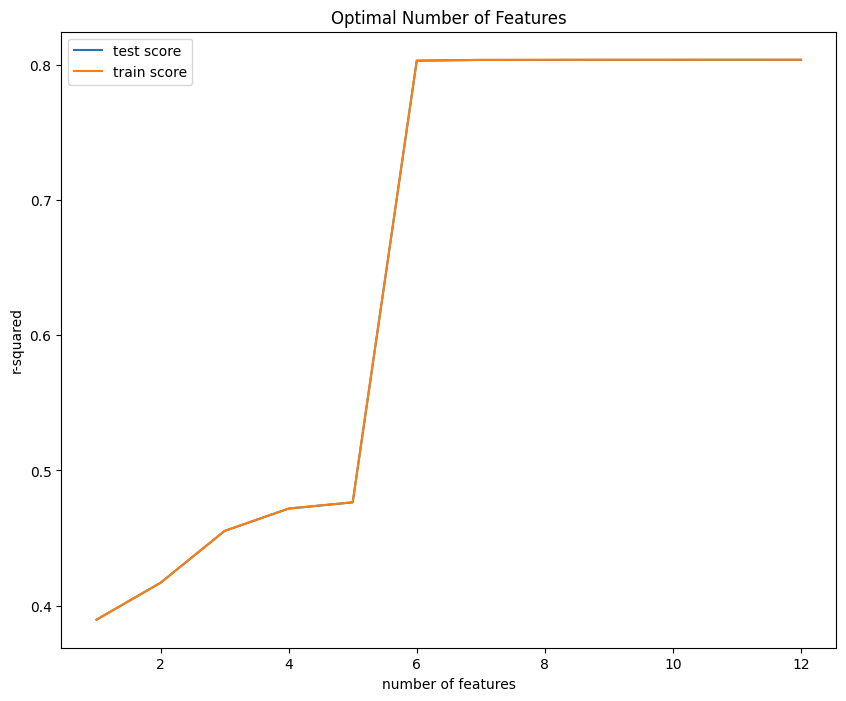

In [73]:
# plotting the results
plt.figure(figsize=(10,8))

plt.plot(results["param_n_features_to_select"], results["mean_test_score"])
plt.plot(results["param_n_features_to_select"], results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

We'll select 6 features

In [74]:
# let us look at the selected features for nb_features = 6
model = LinearRegression()
model.fit(X=X, y=y)

feat_extrac = RFE(model, n_features_to_select=6)
feat_extrac = feat_extrac.fit(X, y)

list(zip(X.columns, feat_extrac.support_, feat_extrac.ranking_))

[('acousticness', True, 1),
 ('danceability', True, 1),
 ('duration_ms', False, 8),
 ('energy', True, 1),
 ('instrumentalness', False, 6),
 ('key', False, 7),
 ('liveness', False, 5),
 ('loudness', True, 1),
 ('mode', False, 4),
 ('popularity', True, 1),
 ('speechiness', False, 2),
 ('tempo', False, 3),
 ('valence', True, 1)]

The selected features are acousticness, danceability, energy, loudness, popularity and valence.

#### Model

In [76]:
model = LinearRegression()
model.fit(X, y)

model_reduced = RFE(model, n_features_to_select=6)
model_reduced.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

#### Prediction on test data

In [77]:
# get test data
X_test = df_test.drop(columns=["artists", "explicit", "id", "name", "year"])
y_test = df_test["year"]

# scale the data
features = ["acousticness", "danceability", "duration_ms", "energy",
            "instrumentalness", "key", "liveness", "loudness",
            "speechiness", "tempo", "valence"]

X_test[features] = scaler.fit_transform(X_test[features])

pred = model_reduced.predict(X_test)

score = model_reduced.score(X_test, y_test) 

print(f"Coefficient of determination : {score}")

Coefficient of determination : 0.8002726938921718


On test data 80% of the variation of year are explained by acousticness, danceability, energy, loudness, valence and popularity.

In [78]:
score_train = model_reduced.score(X, y)
score_train

0.8032941640540062

#### Visualization on test data

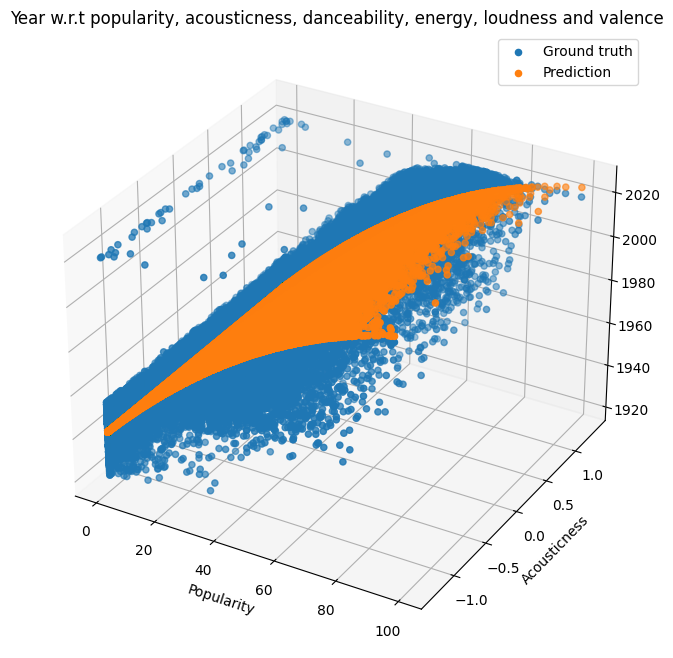

In [80]:
popularity = np.array(X_test["popularity"]).reshape(-1, 1)
year = np.array(y_test).reshape(-1, 1)
acous = np.array(X_test["acousticness"]).reshape(-1, 1)

# to get a nice plot
stack = np.hstack((popularity, year, pred.reshape(-1, 1)))
sorted_st = stack[np.argsort(stack[:,0])]
popularity, year, pred = np.hsplit(sorted_s, 3)


# plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(popularity, acous, year, label="Ground truth")
ax.scatter(popularity, acous, pred, label="Prediction")
ax.set_xlabel("Popularity")
ax.set_ylabel("Acousticness")
ax.set_title("Year w.r.t popularity, acousticness, danceability, energy, loudness and valence")
plt.legend()
plt.show()

### Final comparison of the scores

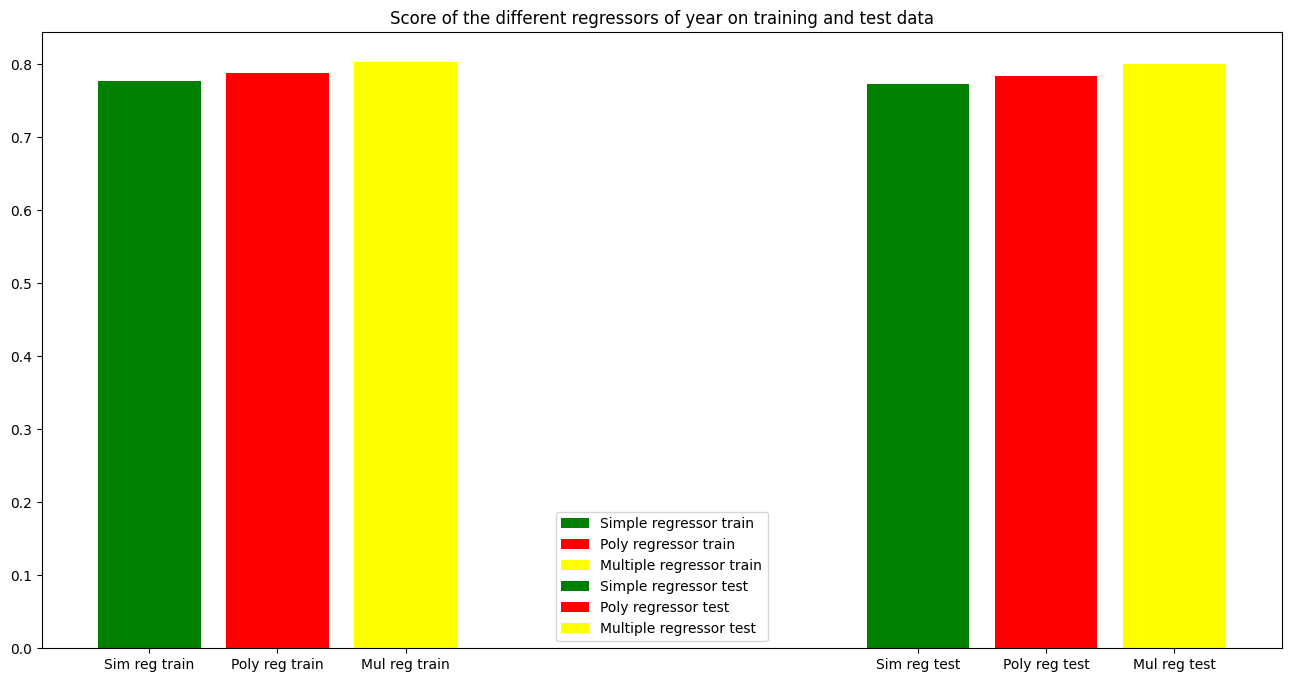

In [141]:
plt.figure(figsize=(16,8))
x = [1,2,3,7,8,9]
y = [score_simple_train, score_poly_train, score_train, score_simple_test, score_poly_test, score]
colors = ["green", "red", "yellow", "green", "red", "yellow"]
labels = ["Sim reg train", "Poly reg train", "Mul reg train", "Sim reg test", "Poly reg test", "Mul reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Multiple regressor train", "Simple regressor test", "Poly regressor test", 
        "Multiple regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors of year on training and test data")
plt.legend()
plt.show()

The multiple linear regressor is definetly better than the other regressors. 

Another good point is that the behavior on test data is the same as the behavior on training data. Means the model doesn't underfit or overfit. We then not need to do regularization

# Classification of mode

## Visualization

### Amount of different modes

There are 2 modes : minor(0) and major(1). \
Let us look at the amount of each mode on the training set

In [14]:
nb_major = len(new_df[new_df["mode"] == 1])
nb_minor = len(new_df[new_df["mode"] == 0])

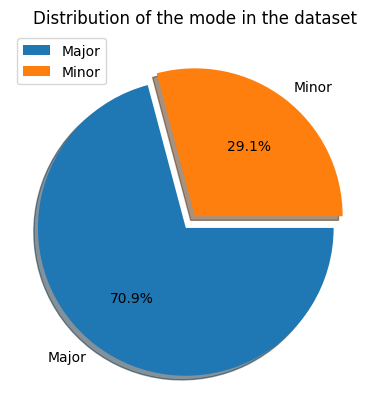

In [127]:
explode = [0.1,0]
plt.pie(x=[nb_major, nb_minor], labels=["Major", "Minor"], counterclock=False, shadow=True, autopct='%1.1f%%', explode=explode)
plt.title("Distribution of the mode in the dataset")
plt.legend()
plt.show()

The mode seems to be imbalanced.\
We will thus perform data reduction.

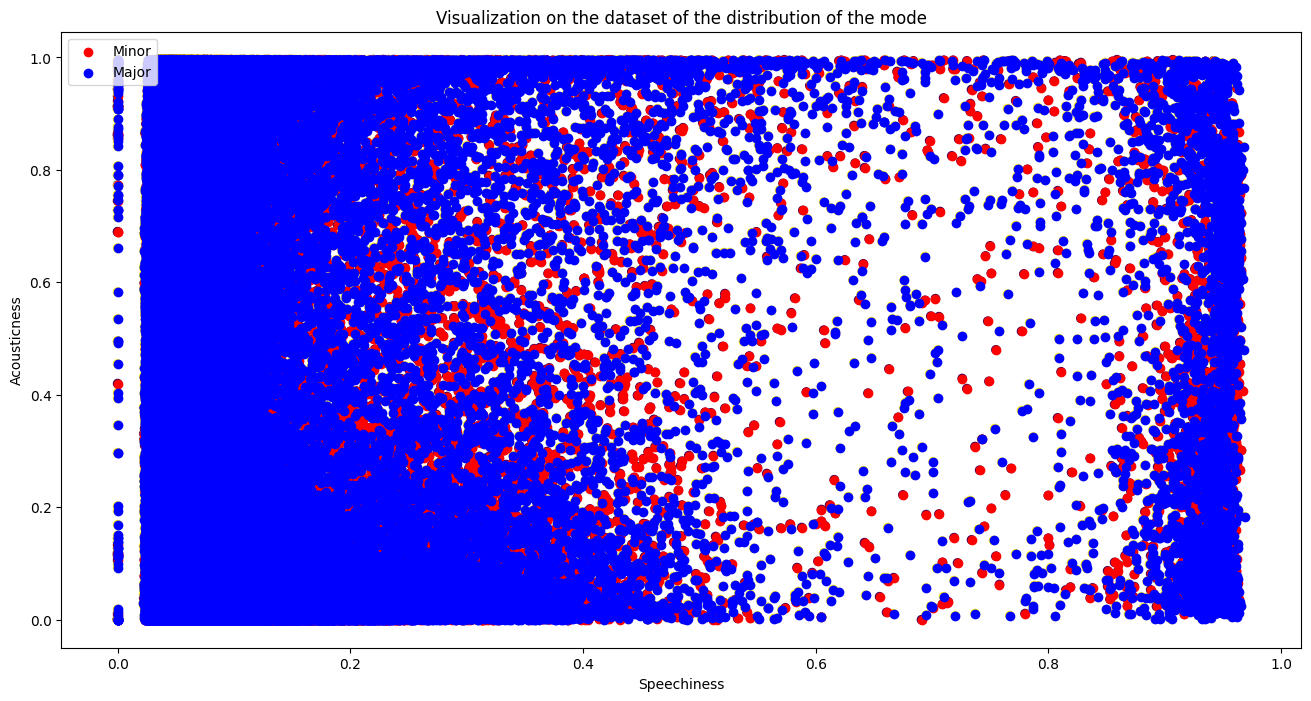

In [133]:
plt.figure(figsize=(16,8))
plt.scatter(np.array(new_df["speechiness"]), np.array(new_df["acousticness"]), c=np.array(new_df["mode"]))
colors = ["red", "blue"]
labels = ["Minor", "Major"]
for i in [0,1]:
    plt.scatter(np.array(new_df[new_df["mode"] == i]["speechiness"]), np.array(new_df[new_df["mode"] == i]["acousticness"]),
                c=colors[i], label=labels[i])
plt.xlabel("Speechiness")
plt.ylabel("Acousticness")
plt.title("Visualization on the dataset of the distribution of the mode")
plt.legend(loc="upper left")
plt.show()

### Sparsity matrix

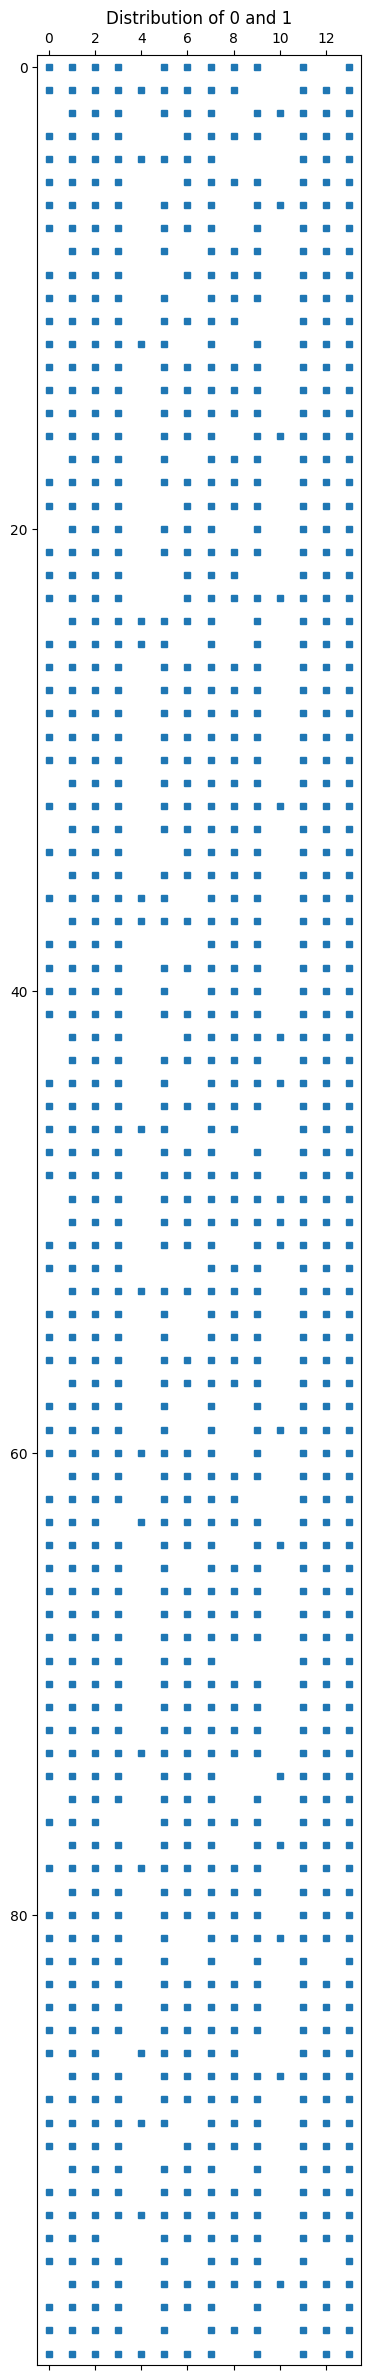

In [134]:
temp = df_train.drop(columns=["name", "id", "explicit", "artists"])
plt.figure(figsize=(10, 30))
plt.spy(temp[:100].values, precision=0.1, markersize=5)
plt.title("Distribution of 0 and 1")
plt.show()

## Downsample the data

In [15]:
print(len(new_df))
print(f"Number of minors : {len(new_df[new_df['mode'] == 0])}")
print(f"Number of majors : {len(new_df[new_df['mode'] == 1])}")

169909
Number of minors : 49519
Number of majors : 120390


We actually have 169909 data.\
But we know that support vector machine performs well on small amount of data.\ 
That's the reason why we will downsample those data to make sure we get 1000 of each category.

1. Split the dataframe into major and minors

In [16]:
df_svm = new_df.drop(columns=["name", "id", "explicit", "artists"])

In [17]:
df_svm_major = df_svm[df_svm["mode"] == 1]
df_svm_minor = df_svm[df_svm["mode"] == 0]

2. Downsample of df_svm_major

In [18]:
df_major_downsampled = resample(df_svm_major,
                                replace=False,
                                n_samples=1000,
                                random_state=1)

In [19]:
# check its length
len(df_major_downsampled)

1000

In [20]:
# check no duplicates
df_major_downsampled.drop_duplicates(inplace=True)

In [21]:
len(df_major_downsampled)

1000

3. Downsample of df_svm_minor

In [22]:
df_minor_downsampled = resample(df_svm_minor,
                                replace=False,
                                n_samples=1000,
                                random_state=1)

In [23]:
# check the length
len(df_minor_downsampled)

1000

In [24]:
# check duplicates
df_minor_downsampled.drop_duplicates(inplace=True)

In [25]:
len(df_minor_downsampled)

1000

Everything is ok

4. Merge the 02 dataframes

In [26]:
new_df_svm = pd.concat((df_major_downsampled, df_minor_downsampled))
len(new_df_svm)

2000

That's greatttt !!!

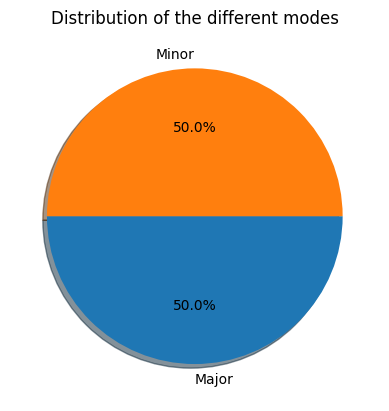

In [27]:
nb_major = len(new_df_svm[new_df_svm["mode"] == 1])
nb_minor = len(new_df_svm[new_df_svm["mode"] == 0])
plt.title("Distribution of the different modes")
plt.pie(x=[nb_major, nb_minor], labels=["Major", "Minor"], counterclock=False, shadow=True, autopct='%1.1f%%')
plt.show()

## Splitting

In [28]:
X = new_df_svm.drop(columns=["mode"]).copy()
X.reset_index(drop=True, inplace=True)
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.698000,0.445,391987,0.5440,0.477,9,0.1150,-10.925,51,0.0314,101.172,0.222,2006
1,0.994000,0.442,203947,0.3730,0.730,5,0.1670,-9.020,0,0.0436,133.024,0.698,1940
2,0.000036,0.480,233000,0.7930,0.197,2,0.0732,-10.209,50,0.0892,96.062,0.425,1994
3,0.943000,0.617,174533,0.0229,0.000,0,0.0721,-19.924,16,0.0642,75.684,0.297,1945
4,0.399000,0.629,234133,0.7840,0.000,1,0.3100,-6.435,39,0.3790,89.926,0.700,1998


In [29]:
y = new_df_svm["mode"].copy()
y.reset_index(drop=True, inplace=True)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: mode, dtype: int8

## Centering and Scaling the data

In [30]:
from sklearn.preprocessing import scale

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
print(len(X_train_scaled))
len(X_test_scaled)

1500


500

## Preliminary Support Vector Machine

After all that cleaning part, let us dive into SVMMMMMM !!!

### Model

In [33]:
clf_svm = SVC(random_state=1)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=1)

### Test on the testing dataset + Confusion matrix

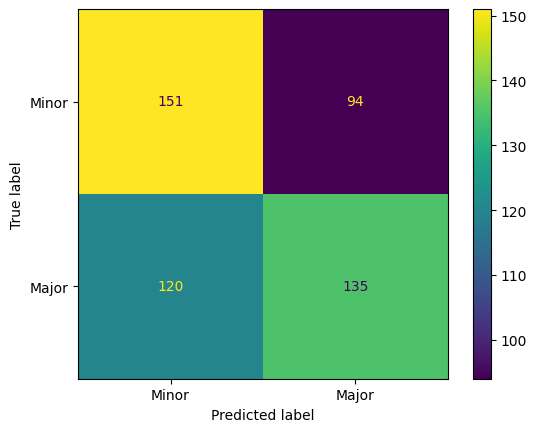

In [154]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test, display_labels=["Minor", "Major"])
plt.show()

In the confusion matrix, we can see that from 245 songs that were minor, 151(61.63%) were correctly classified. \
And from the 255 songs that were major, 135(52.94) were correctly classified.\
We got thus an accuracy of 53.2%. \
Let us improve those results by cross validation.

## Optimization of the parameters with cross validation and GridSearchCV

The goal here is to find the best value for **gamma**(recall the formula of the gaussian kernel) and the parameter C.

In [34]:
# instantiate gridsearchcv
clf = GridSearchCV(
    estimator=SVC(),
    param_grid = {
        "C" : [0.5, 1, 10, 100],
        "gamma" : ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel" : ["rbf"]
    }
)

# fit the data
clf.fit(X_train_scaled, y_train)

# get the best parameters
print(clf.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


Best paramters : 
    C : 1,
    gamma : 1,
    kernel : "rbf"

## Final SVM

Now let us build the optimal classifier.

### Model

In [156]:
clf_svm = SVC(random_state=1, gamma=1)
clf_svm.fit(X_train_scaled, y_train)

SVC(gamma=1, random_state=1)

### Test + Confusion Matrix

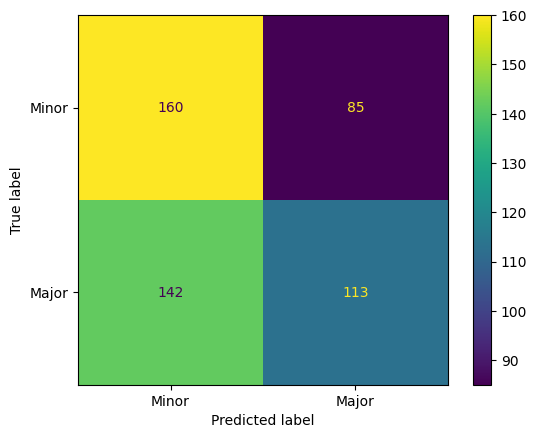

In [157]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test, display_labels=["Minor", "Major"])
plt.show()

Final accuracy : 54.6.\
Our classifier is pretty bad.

## Plot of the SVM hyperplane

In [118]:
df_svm.shape

(169909, 14)

### Features for data representation

Our original dataframe has 13 columns(without "mode" column).\
And fortunately, we can't represent data in 13 dimensions. \
Godthanks, PCA exists. So, we'll perform PCA on X_train_scaled

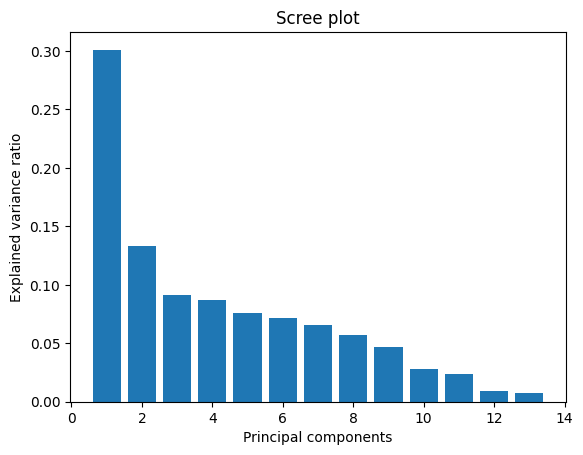

In [37]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

plt.title("Scree plot")
plt.bar(np.arange(1, len(pca.components_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.show()

**Comment :**

We are aware of the fact that the 2(even the 3) first components don't represent much of the original variance of our data.

But for the sake of visualization, we will use the 02 first components.

### Train of the classifier on those data

Now let us train our classifier on those specific data

In [38]:
X_train_pca[:2, :2]

array([[-0.02420233,  0.75303351],
       [ 2.45976326, -0.07275606]])

In [39]:
# scale the 2 first components
pca_scaled = scale(X_train_pca[:, :2])

In [40]:
pca_scaled.shape

(1500, 2)

In [41]:
pca_scaled[:2]

array([[-0.01223317,  0.57234511],
       [ 1.24329775, -0.05529843]])

In [42]:
clf = GridSearchCV(
    estimator = SVC(),
    param_grid = {
        "C" : [0.5, 1, 10, 100],
        "gamma" : ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel" : ["rbf"]
    },
    scoring = "accuracy"
)

# fit the data
clf.fit(pca_scaled, y_train)

# get the best parameters
print(clf.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
# train the model with the best parameters
clf_svm = SVC(random_state=1, C=1, gamma=0.1)
clf_svm.fit(pca_scaled, y_train)

SVC(C=1, gamma=0.1, random_state=1)

### Test of the classifier

In [44]:
X_test_pca = pca.transform(X_test_scaled)

# let us create a matrix of points to show the decision regions
x_min = X_test_pca[:, 0].min() - 1
x_max = X_test_pca[:, 0].max() + 1

y_min = X_test_pca[:, 1].min() - 1
y_max = X_test_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, step=0.1),
                         np.arange(y_min, y_max, step=0.1))

prediction = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

In [45]:
clf_svm.score(X_test_pca[:,:2], y_test)

0.534

In [46]:
prediction.shape

(14497,)

In [47]:
prediction = prediction.reshape(xx.shape)
prediction.shape

(133, 109)

In [53]:
X_test_pca.shape

(500, 13)

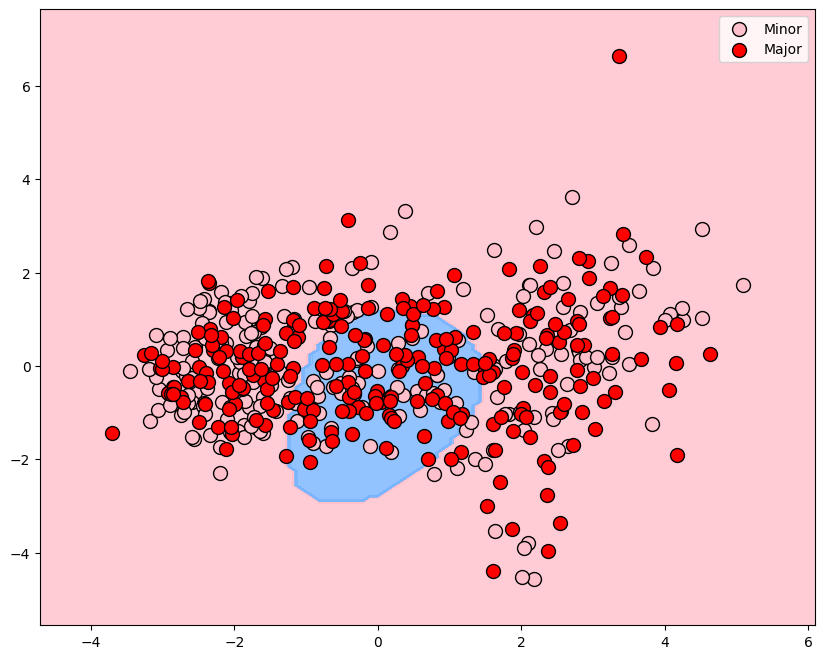

In [63]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
color = ["pink", "red"]
labels = ["Minor", "Major"]
cmap = colors.ListedColormap(["pink", "#77b5fe"])
ax.contourf(xx, yy, prediction, cmap=cmap,  alpha=0.8)
for i in [0,1]:
    indexes = np.where(y_test == i)[0]
    ax.scatter(X_test_pca[indexes,0], X_test_pca[indexes, 1], c=color[i], s=100, edgecolors="k", alpha=1, label=labels[i])

plt.title("")
plt.legend()
plt.show()


The points in the blue contour are the points which will be classified as major. While the points out of it will be classified as minor.

# Clustering

On this section, we are going to perform clustering using k-means algorithm. 

The goal is to see if we got any cluster over the points.

For the sake of complexity, we are going to take data represented in the PCA space and as features the 3 first components and we will come back to our original data in the end to explain those clusters.

## Add the genre column

In [113]:
df_cluster = new_df.copy()

In [114]:
# get the genres of the songs
genres = []
with open("genres.csv", "r") as f:
    csv_file = csv.reader(f)
    
    for line in csv_file :
        genres.append(line)
        

df_cluster = df_cluster[:len(genres)]

df_cluster["genres"] = genres

print(f"Size of df_cluster : {len(df_cluster)}")
df_cluster.head()

Size of df_cluster : 16795


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,genres
0,0.995,'Carl Woitschach',0.708,158648,0.1950,False,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,[none]
1,0.994,"'Robert Schumann', 'Vladimir Horowitz'",0.379,282133,0.0135,False,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,"[classical, early romantic era, german romanti..."
2,0.604,'Seweryn Goszczyński',0.749,104300,0.2200,False,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,[none]
3,0.995,'Francisco Canaro',0.781,180760,0.1300,False,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,"[tango, vintage tango]"
4,0.990,"'Frédéric Chopin', 'Vladimir Horowitz'",0.210,687733,0.2040,False,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,"[classical, early romantic era, polish classic..."


## Preprocessing

In [115]:
# preprocessing
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16795 entries, 0 to 16794
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      16795 non-null  float64
 1   artists           16795 non-null  string 
 2   danceability      16795 non-null  float64
 3   duration_ms       16795 non-null  int64  
 4   energy            16795 non-null  float64
 5   explicit          16795 non-null  bool   
 6   id                16795 non-null  string 
 7   instrumentalness  16795 non-null  float64
 8   key               16795 non-null  int8   
 9   liveness          16795 non-null  float64
 10  loudness          16795 non-null  float64
 11  mode              16795 non-null  int8   
 12  name              16795 non-null  string 
 13  popularity        16795 non-null  int8   
 14  speechiness       16795 non-null  float64
 15  tempo             16795 non-null  float64
 16  valence           16795 non-null  float6

In [116]:
# a lot of songs have different genres. To be able to make a good clustering, we'll choose the first genre associated in the list
genres = []
for genre in df_cluster["genres"]:
    genres.append(genre[0])
    
df_cluster["genres"] = genres

In [161]:
df_cluster.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,genres
0,0.995,'Carl Woitschach',0.708,158648,0.1950,False,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,none
1,0.994,"'Robert Schumann', 'Vladimir Horowitz'",0.379,282133,0.0135,False,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,classical
2,0.604,'Seweryn Goszczyński',0.749,104300,0.2200,False,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,none
3,0.995,'Francisco Canaro',0.781,180760,0.1300,False,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,tango
4,0.990,"'Frédéric Chopin', 'Vladimir Horowitz'",0.210,687733,0.2040,False,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,classical


In [117]:
df_cluster["genres"] = df_cluster["genres"].astype("string")

In [118]:
# now let us replace none by empty value
df_cluster["genres"] = df_cluster["genres"].str.replace("none", "")

In [164]:
df_cluster.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,genres
0,0.995,'Carl Woitschach',0.708,158648,0.1950,False,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,
1,0.994,"'Robert Schumann', 'Vladimir Horowitz'",0.379,282133,0.0135,False,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,classical
2,0.604,'Seweryn Goszczyński',0.749,104300,0.2200,False,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,
3,0.995,'Francisco Canaro',0.781,180760,0.1300,False,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,tango
4,0.990,"'Frédéric Chopin', 'Vladimir Horowitz'",0.210,687733,0.2040,False,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,classical


In [119]:
# as genre could give us information on clustering, we want to remove data without genre
indexes = df_cluster[df_cluster["genres"] == ""].index

df_cluster.drop(indexes, inplace=True)
df_cluster.reset_index(drop=True)

print(f"Final length : {len(df_cluster)}")

Final length : 15374


In [120]:
df_cluster.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,genres
1,0.994,"'Robert Schumann', 'Vladimir Horowitz'",0.379,282133,0.0135,False,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,classical
3,0.995,'Francisco Canaro',0.781,180760,0.1300,False,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,tango
4,0.990,"'Frédéric Chopin', 'Vladimir Horowitz'",0.210,687733,0.2040,False,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,classical
5,0.995,"'Felix Mendelssohn', 'Vladimir Horowitz'",0.424,352600,0.1200,False,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,0.0593,63.521,0.2660,1928,classical
6,0.956,"'Franz Liszt', 'Vladimir Horowitz'",0.444,136627,0.1970,False,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,0.0400,80.495,0.3050,1928,classical


## Clustering

### PCA for dimensionality reduction + visualization

In [121]:
ids = df_cluster["id"]
clus = df_cluster.drop(columns=["genres", "name", "artists", "id", "explicit", "mode"])

In [122]:
# scale
scaler = StandardScaler()

clus = scaler.fit_transform(clus)

# pca to reduce the dimensionality
pca = PCA()
model = pca.fit_transform(clus)

columns = [f"PC {i+1}" for i in range(pca.n_components_)]

In [123]:
temp_df = pd.DataFrame(model, columns=columns, index=ids)
temp_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
id,,,,,,,,,,,,,
6KuQTIu1KoTTkLXKrwlLPV,5.378527,0.580802,-0.593417,0.056232,-1.013308,0.431098,0.544609,-0.949559,-0.265851,0.728618,-0.722961,-0.478961,-0.423646
6M94FkXd15sOAOQYRnWPN8,3.047547,-2.084420,-0.832605,-0.746055,1.232440,1.038713,0.554019,-1.508675,0.205629,-0.767055,-0.894248,0.342730,-0.412203
6N6tiFZ9vLTSOIxkj8qKrd,4.674132,1.979785,0.938336,-0.046159,-2.014148,2.934968,0.901046,0.035790,-0.911224,-0.585383,0.032053,0.081894,-0.475508
6NxAf7M8DNHOBTmEd3JSO5,4.491928,0.232334,-0.311289,0.029544,-0.476876,1.611737,0.116628,-0.962321,-0.686530,-0.250695,-0.407999,0.058397,-0.427953
6O0puPuyrxPjDTHDUgsWI7,3.566613,-0.834386,-0.558622,-0.285316,-1.767925,0.078797,-0.634414,-0.075492,-0.891149,-0.055047,-0.550100,-0.127468,-0.438112


### Number of clusters selection

In [124]:
data = temp_df.iloc[:, :3]
data.shape

(15374, 3)

In [125]:
X = np.array(data)

In [126]:
values_k = np.arange(1,21)
scores = np.zeros(len(values_k)+1)
for i in values_k:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(X)
    scores[i] = kmeans.score(X)

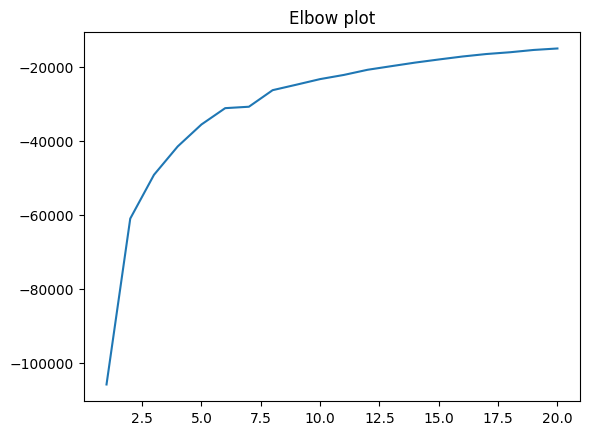

In [127]:
plt.title("Elbow plot")
plt.plot(np.arange(1,21), scores[1:])
plt.show()

The good number of clusters is 7. 

Now let us plot our data with their labels.

In [130]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X)
centroids, labels = kmeans.cluster_centers_, kmeans.labels_

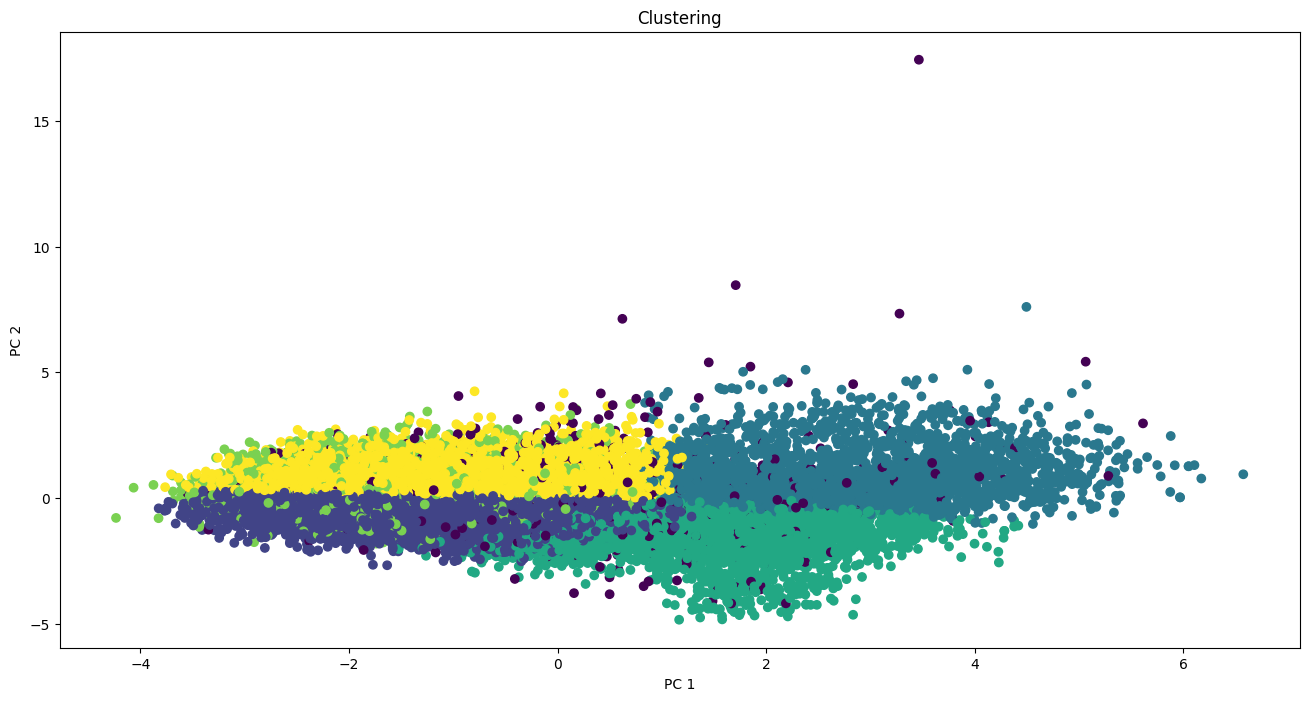

In [131]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.set_title("Clustering")
ax.scatter(model[:, 0], model[:, 1], c=labels)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
plt.show()

## Analysis

In [138]:
# yellow cluster and light green cluster
indexes = temp_df[(temp_df["PC 1"] <= 0) & (temp_df["PC 2"] > 0)].index.tolist()
print(df_cluster[df_cluster["id"].isin(indexes)]["year"].unique())
df_cluster[df_cluster["id"].isin(indexes)]["genres"].unique()

[1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 1960]


<StringArray>
[       'album rock',   'adult standards',      'classic rock',
 'instrumental soul',             'blues',          'art rock',
        'blues rock',         'acid rock',           'chanson',
             'disco',
 ...
 'minnesota hip hop',       'country pop',       'houston rap',
     'chicago drill',  'background piano',          'desi pop',
      'detroit trap',   'neo-psychedelic', 'corridos tumbados',
   'latin classical']
Length: 624, dtype: string

There we actually have an overlappy of two clusters(yellow and light green). If make a relation with the results we got from the criteria that make a song popular, we will notice that all those songs represent songs with small acousticness. It represents the emergence of hip-hop and rock in all its forms.

In [139]:
# dark blue cluster
indexes = temp_df[(temp_df["PC 1"] <= -1) & (temp_df["PC 2"] <0)].index.tolist()
print(df_cluster[df_cluster["id"].isin(indexes)]["year"].unique())
df_cluster[df_cluster["id"].isin(indexes)]["genres"].unique()

[1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


<StringArray>
[        'adult standards',                    'funk',
            'classic soul',        'british invasion',
              'album rock',         'australian rock',
           'british blues',   'mexican rock-and-roll',
            'classic rock',           'bubblegum pop',
 ...
             'chicago bop',       'japanese chillhop',
               'bass trap',               'viral rap',
             'lo-fi chill',            'country dawn',
 'neo-traditional country',                 'pop r&b',
                 'cubaton',           'chicago drill']
Length: 499, dtype: string

This cluster is overlapping the light blue cluster. We remain on the era of development of rock, but we also have r&b.
It seems like american and british cultures were influencing the rest of the worlds because we also see genres like japanese chillhop which is japanese music influenced by hip hop.

In [135]:
# green cluster
indexes = temp_df[(temp_df["PC 1"] >= 0) & (temp_df["PC 1"] <= 2) & (temp_df["PC 2"] <= -4)].index.tolist()
print(df_cluster[df_cluster["id"].isin(indexes)]["year"].unique())
df_cluster[df_cluster["id"].isin(indexes)]["genres"].unique()

[1947 1935 1940 1945 1946 1950 1951 1953]


<StringArray>
[     'kashmiri pop',         'hoerspiel',     'romanian folk',
    'acoustic blues',         'classical',    'greek clarinet',
             'c-pop', 'classic bollywood',           'calypso',
             'filmi',             'bebop',             'tango',
      'modern blues',     'muzica usoara',          'rebetiko']
Length: 15, dtype: string

The green cluster describes emergence of afro, asiatic and south american genres of songs.

In [140]:
# light blue cluster
indexes = temp_df[(temp_df["PC 1"] > 4) & (temp_df["PC 2"] > 0)].index.tolist()
print(df_cluster[df_cluster["id"].isin(indexes)]["year"].unique())
df_cluster[df_cluster["id"].isin(indexes)]["genres"].unique()

[1928 1935 1936 1940 1942 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1965 1974 1980 1984
 1985 1988 1995 1996 2000 2019 1930 1964 1968 1972 1975 1976 2001 2002
 2010]


<StringArray>
[                 'classical',  'american modern classical',
     'early modern classical',              'classical era',
   'british modern classical',   'russian modern classical',
        'classic italian pop',         'canzone napoletana',
                    'baroque',               'puirt-a-beul',
         'early romantic era',         'classic soundtrack',
                      'comic',                'jazz violin',
             'easy listening',           'rumeli turkuleri',
        'rwandan traditional',               'german opera',
            'adult standards',                  'cool jazz',
 'african-american classical',     'taiwan graduation song',
                   'art rock',        'classic country pop',
                    'grupera',                    'country',
                  'jazz funk',                 'album rock',
           'alternative rock',                 'dance rock',
        'alternative country',          'alternative metal',
          

This clusters overlaps the dark blue cluster. In addition to british and american genres, we have the emergence of traditional afro genres and some latino genres.